# Data Description

- ID : Id customer
- Year_Birth : Year birth of customer 
- Education : Tertiary education 
- Marital_Status : Marital status of customer 
- Income : Income
- Kidhome : Number of small children in customers 
- Teenhome : Number of teenagers in customers
- Dt_Customer : Date of customers enrolment with the company
- Recency : Number of days since the last purchase
- MntCoke : Amount spent on coke products
- MntFruits : Amount spent on fruits products
- MntMeatProducts : Amount spent on meal products
- MntFishProducts : Amount spent on fish products
- MntSweetProducts : Amount spent on sweet products
- MntGoldProds : Amount spent on coke gold products
- NumDealsPurchases : Number of purchases made with discount
- NumWebPurchases : Number of purchases made through company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp3 : customer accepted the offer in the 3rd campaign, yes=1 and no=0
- AcceptedCmp4 : customer accepted the offer in the 4th campaign, yes=1 and no=0
- AcceptedCmp5 : customer accepted the offer in the 5th campaign, yes=1 and no=0
- AcceptedCmp1 : customer accepted the offer in the 1st campaign, yes=1 and no=0
- AcceptedCmp2 : customer accepted the offer in the 2nd campaign, yes=1 and no=0
- Complain : if customer complained, yes=1 and no=0
- Z_CostContact : Cost to contact a customer
- Z_Revenue : Revenue after customer accepting campaign
- Response :  Customer accepted the offer in the last campaign, yes=1, no=0

# Exploratory Data Analysis 

## Import Library

In [96]:
import pandas as pd
import numpy as np

#plot
import seaborn as sns
import matplotlib.pyplot as plt

#statistika
import statsmodels.api as sm
import scipy.stats as stats 

#time
from datetime import date

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

#Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA

## Load Data

In [3]:
df = pd.read_csv('marketing_campaign_data.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 30)

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Mengelompokkan kolom berdasarkan tipe datanya 

In [9]:
categoric = df[['ID','Year_Birth','Education', 'Marital_Status','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]
categoric = categoric.astype(str)

date = df[['Dt_Customer']]
date['Dt_Customer'] = pd.to_datetime(date['Dt_Customer'], format='%d-%m-%Y')

numeric = df.drop(categoric.columns, axis=1)
numeric = numeric.drop(date.columns, axis=1)

## Descriptive Statistic

In [10]:
numeric.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [11]:
categoric.describe()

,ID,Year_Birth,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,6,2,2,2,2,2,2,2
top,5524,1976,S1,Menikah,0,0,0,0,0,0,0
freq,1,89,1127,864,2077,2073,2077,2096,2210,2219,1906


In [12]:
date.describe()

,Dt_Customer
count,2240
unique,663
top,2012-08-31 00:00:00
freq,12
first,2012-07-30 00:00:00
last,2014-06-29 00:00:00


## Handling Missing Value

In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Pada variabel Income terdapat missing value, pada case ini akan diisi dengan median (karena mean != median) indikasi skewed

<AxesSubplot:xlabel='Income', ylabel='Density'>

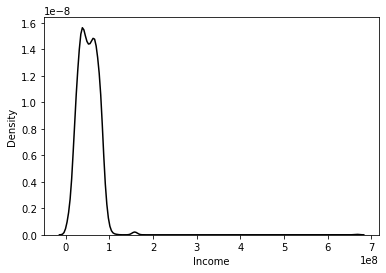

In [14]:
sns.kdeplot(x=df['Income'], color='Black')

In [15]:
df['Income'].fillna(df['Income'].quantile(0.5), inplace=True)

In [16]:
df['Income'].isnull().sum()

0

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Inkonsistensi Data

- Konsumen yang melakukan transaksi di web namun tidak ada kunjungan web akan dihapus dari dataset

In [18]:
df = df[~((df['NumWebPurchases']>0) & (df['NumWebVisitsMonth']==0))]

## Handling Duplicated Data

In [19]:
df.duplicated().sum()

0

- Tidak ada data duplicated pada dataset ini 

## Feature Engineering

### Mengelompokkan Kategori Umur

- Di bawah 15 tahun: Kelompok usia anak-anak
- 15-24 tahun: Kelompok usia muda
- 25-34 tahun: Kelompok usia pekerja awal
- 35-44 tahun: Kelompok usia paruh baya
- 45-54 tahun: Kelompok usia pra-pensiun
- 55-64 tahun: Kelompok usia pensiun
- 65 tahun ke atas: Kelompok usia lanjut

https://sepakat.bappenas.go.id/wiki/Kelompok_Usia#:~:text=Pembagian%20kelompok%20usia%20dalam%20modul%20ini%20adalah%20sebagai,7%2065%20tahun%20ke%20atas%3A%20Kelompok%20usia%20lanjut


In [20]:
from datetime import date
list = []
for i, y in df.iterrows():
    birth_year = df['Year_Birth'][i]
    age = date.today().year - birth_year
    list.append(age)
df['age'] = list

In [21]:
bin =[]

for i,y in df.iterrows():
    if df['age'][i] < 15:
        group = 'Anak-anak \n (0-15)'
        bin.append(group)
    elif df['age'][i] <25:
        group = '''Usia Muda \n(15-24)'''
        bin.append(group)
    elif df['age'][i] <35:
        group = '''Pekerja Awal \n(25-34)'''
        bin.append(group)
    elif df['age'][i] <45:
        group = '''Paruh Baya \n(35-44)'''
        bin.append(group)
    elif df['age'][i] <55:
        group = '''Pra Pensiun \n(45-54)'''
        bin.append(group)
    elif df['age'][i] <65:
        group = '''Pensiun \n(55-64)'''
        bin.append(group)
    else:
        group = '''Usia Lanjut \n 65 ke atas'''
        bin.append(group)
    bin
df['group_age'] = bin

In [22]:
age = df['age'].unique()
age_sort = np.sort(age, axis=0)
age_sort

array([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  81,  82, 122, 123, 129], dtype=int64)

- Nasabah yang berumur minimal 75 tahun akan dihapus, karena usia tersebut kurang tepat jika menerima campaign. Selain itu produk yang dilakukan campaign merupakan produk seperti buah-buahan, minuman bersoda, daging, ikan, produk sweet, coke gold. Hal tersebut dirasa kurang tepat jika dilakukan campaign pada customer yang usianya sudah sangat lanjut

In [23]:
df = df[df['age']<75]

In [24]:
df['group_age'].describe()

count                      2175
unique                        5
top       Pra Pensiun \n(45-54)
freq                        731
Name: group_age, dtype: object

In [25]:
df['group_age'].value_counts()

Pra Pensiun \n(45-54)        731
Pensiun \n(55-64)            485
Paruh Baya \n(35-44)         434
Usia Lanjut \n 65 ke atas    405
Pekerja Awal \n(25-34)       120
Name: group_age, dtype: int64

- Customer terbanyak merupakan kelompok usia paruh baya 35-44 tahun, dan paling sedikit merupakan kelompok usia lanjut. 

### Mengelompokkan Kategori Income

https://www.cnbcindonesia.com/news/20211122101015-4-293310/gaji-rp-8-juta-sebulan-semuanya-kena-pajak-bu-sri-mulyani
- Rp 0-Rp 60 juta tarif 5%
- Rp Rp 60- Rp 250 juta tarif 15% 
- Rp 250 - Rp 500 juta tarif 25%
- Rp 500 juta - Rp 5 miliar tarif 30%
- Rp 5 miliar ke atas tarif 35%

Untuk pengelompokkan income, idenya dari sumber di atas. Hanya pada pengelompokan ini saya kelompokkan income per bulan
- Kategori I : Rp 0 - Rp 5 juta
- Kategori II : 5 juta ke atas - 20 juta  
- Kategori III : 20 juta ke atas - 40 juta 
- Kategori IV : 40 juta ke atas - 400 juta 
- Kategori V : 400 juta ke atas



**Feature Engineering Variabel Income**

In [26]:
income = []

for i,y in df.iterrows():
    if df['Income'][i] <= 5000000:
        gaji = '''Kategori I \n(0-5)juta'''
        income.append(gaji)
    elif df['Income'][i] <= 20000000:
        gaji = '''Kategori II \n(>5 - 20)juta'''
        income.append(gaji)
    elif df['Income'][i] <= 40000000:
        gaji = '''Kategori III \n(>20 - 40)juta'''
        income.append(gaji)
    elif df['Income'][i] <= 400000000:
        gaji = '''kategori IV \n(>40 - 400)juta'''
        income.append(gaji)
    else:
        gaji = '''Kategori V \n >400juta'''
        income.append(gaji)
    income
df['group_income'] = income

In [27]:
df['group_income'].value_counts()

kategori IV \n(>40 - 400)juta    1450
Kategori III \n(>20 - 40)juta     599
Kategori II \n(>5 - 20)juta       119
Kategori I \n(0-5)juta              6
Kategori V \n >400juta              1
Name: group_income, dtype: int64

### Mengelompokkan Kategori Jumlah Anak

In [28]:
df['total_children'] = df['Kidhome'] + df['Teenhome']

In [29]:
df['total_children'].value_counts()

1    1120
0     584
2     420
3      51
Name: total_children, dtype: int64

In [30]:
list = []

for i,y in df.iterrows():
    if df['total_children'][i]==0:
        total = '0 Children'
        list.append(total)
    elif df['total_children'][i]<=2:
        total = '(1-2) Children'
        list.append(total)
    else:
        total = '>2 Children'
        list.append(total)
    list

df['group_children'] = list

#### **Total Pengeluaran**

In [31]:
df['total_spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+ \
                       df['MntSweetProducts']+df['MntGoldProds']

#### **Total Transaksi**

In [32]:
df['total_transaksi'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + \
                        df['NumCatalogPurchases'] + df['NumStorePurchases']

#### **Total Campaign**

In [33]:
df['total_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + \
                       df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#### **Status**

In [34]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [35]:
list=[]

for i,y in df.iterrows():
    if df['Marital_Status'][i]=='Lajang' or df['Marital_Status'][i]=='Bertunangan':
        status = 'Belum Menikah'
        list.append(status)
    elif df['Marital_Status'][i] == 'Menikah':
        status = 'Menikah'
        list.append(status)
    else:
        status = 'Cerai Mati/Hidup'
        list.append(status)
    list

df['Marital_Status_New'] = list

#### **Number of day Customers Enrolment with company**

In [36]:
from datetime import date

list = []
for i, y in df.iterrows():
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
    appl_date = df['Dt_Customer'][i]
    enrol = date.today().year - appl_date.year
    list.append(enrol)
list
df['customer_enrolment_year'] = list

#### **Make bin Number of day last purchase**

In [37]:
list = []

for i,y in df.iterrows():
    if df['Recency'][i]<=30:
        recency = '0-30 hari'
        list.append(recency)
    elif df['Recency'][i]<=60:
        recency = '31-60 hari'
        list.append(recency)
    else:
        recency = '>60 hari'
        list.append(recency)
    list
df['Recency_bin'] = list

#### **Conversion Rate**

In [38]:
#Conversion Rate from Purchase and Web Visit
df['conversion_rate'] = round(df['total_transaksi']/df['NumWebVisitsMonth'],2)

In [39]:
df['conversion_rate'].isnull().sum()

2

In [40]:
df['conversion_rate'].fillna(0, inplace=True)
df['conversion_rate'].replace( [np.inf, -np.inf], 0, inplace=True)

In [41]:
df['conversion_rate'].describe()

count    2175.000000
mean        4.312368
std         4.826376
min         0.000000
25%         1.220000
50%         2.570000
75%         5.330000
max        43.000000
Name: conversion_rate, dtype: float64

In [42]:
df[df.conversion_rate.isnull()] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,group_age,group_income,total_children,group_children,total_spending,total_transaksi,total_campaign,Marital_Status_New,customer_enrolment_year,Recency_bin,conversion_rate


In [43]:
df.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,group_age,group_income,total_children,group_children,total_spending,total_transaksi,total_campaign,Marital_Status_New,customer_enrolment_year,Recency_bin,conversion_rate
381,9543,1985,S1,Menikah,19986000.0,1,0,2013-11-14,74,3000,6000,5000,0,2000,6000,1,0,0,3,7,0,0,0,0,0,0,3,11,0,37,Paruh Baya \n(35-44),Kategori II \n(>5 - 20)juta,1,(1-2) Children,22000,4,0,Menikah,9,>60 hari,0.57


### Univariate Analysis

In [44]:
numeric_new = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',\
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',\
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
       'Z_CostContact', 'Z_Revenue',\
        'age','total_children','total_spending','total_transaksi','total_campaign',\
        'customer_enrolment_year','conversion_rate']]

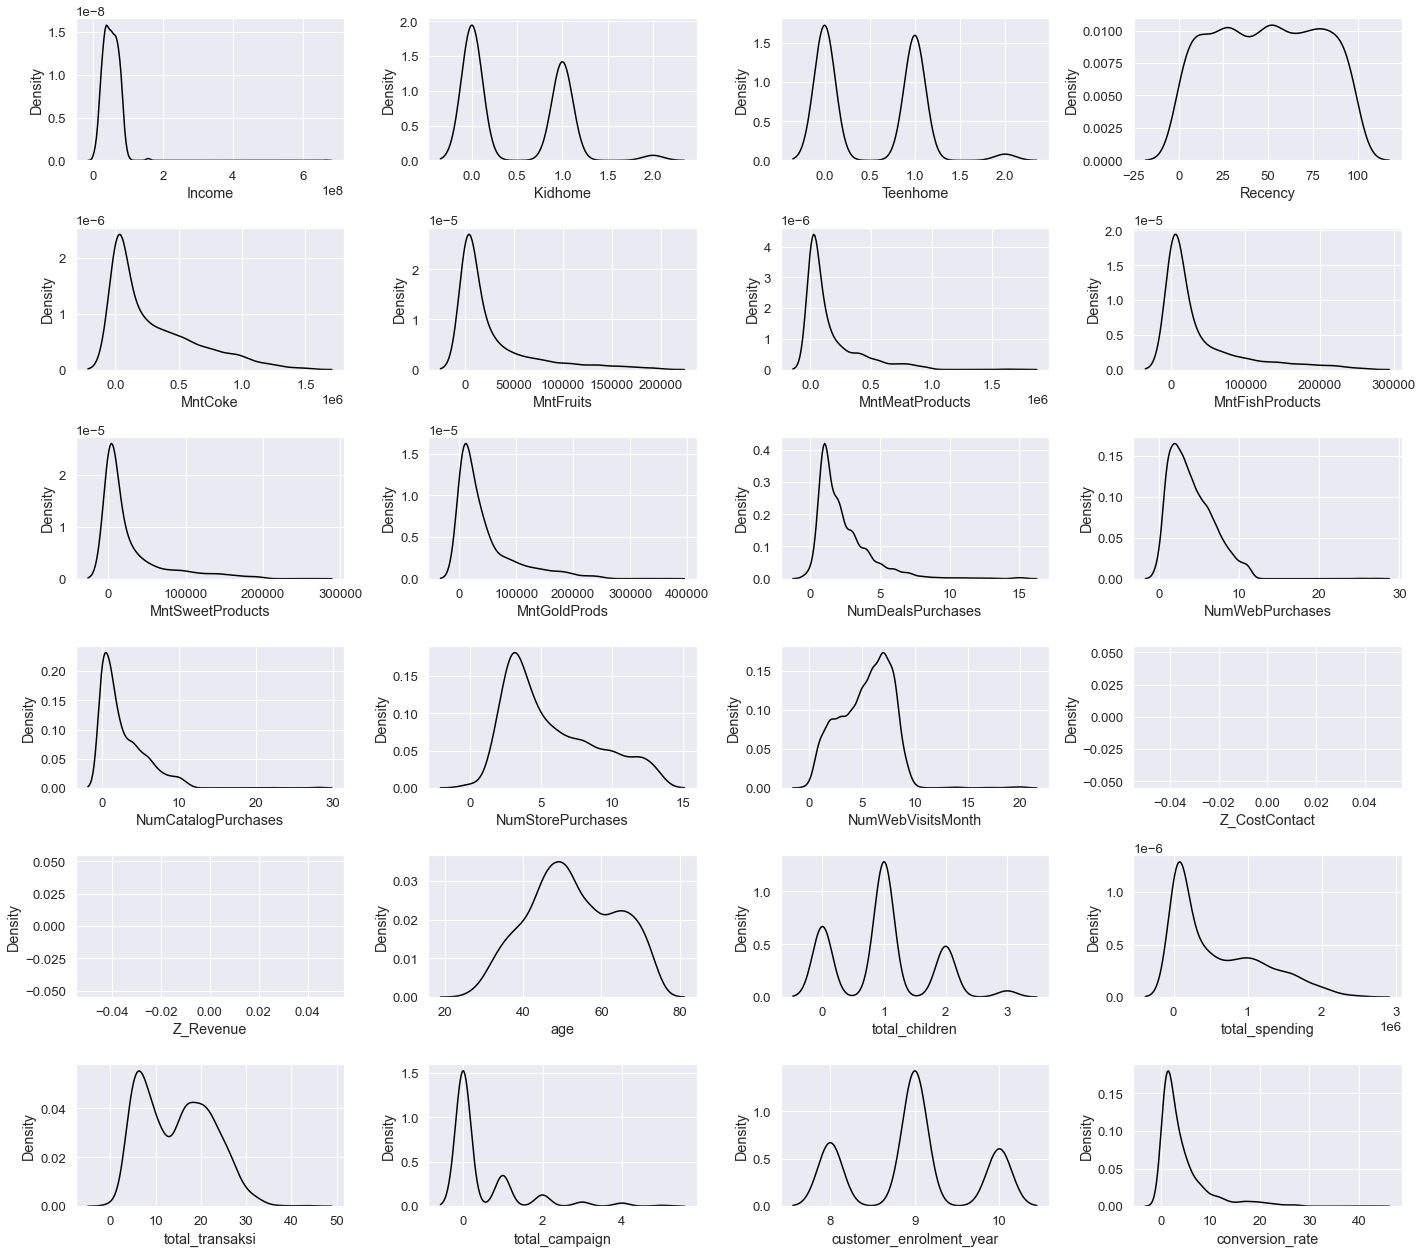

In [45]:
features = numeric_new.columns


for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20,20)
    sns.set(font_scale=1.2)
    plt.subplot(7,4,i+1)
    sns.kdeplot(x=df[features[i]], color='Black')
    plt.xlabel(features[i])
    plt.tight_layout()

In [46]:
categoric_new = df[['Education','AcceptedCmp3',\
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Complain', 'Response',\
       'group_age','group_income','group_children','Marital_Status_New','Recency_bin']]

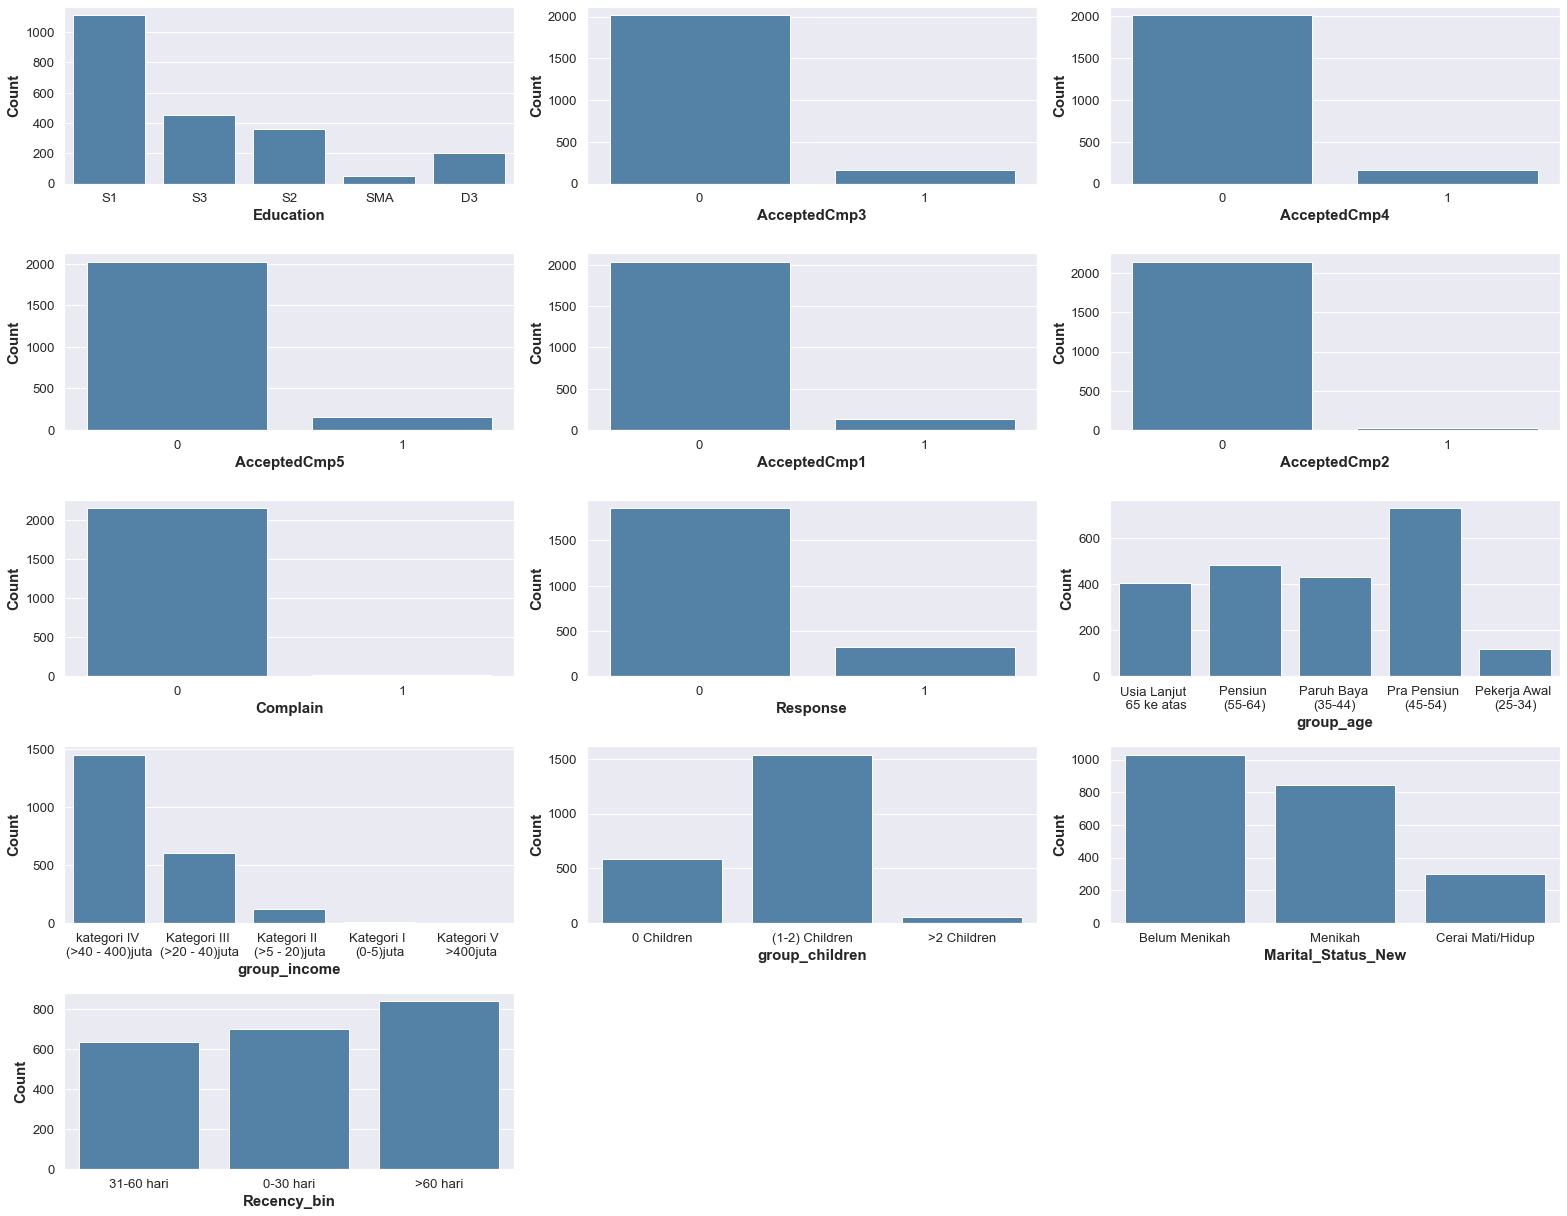

In [47]:
fitur = categoric_new.columns

for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (22,20)
    sns.set(font_scale=1.2)
    plt.subplot(6, 3, i+1)
    sns.countplot(x=df[fitur[i]], color='Steelblue')
    plt.xlabel(fitur[i],fontsize = 15, weight='bold')
    plt.ylabel('Count',fontsize = 15, weight='bold')
    plt.tight_layout()

### Bivariate Analysis

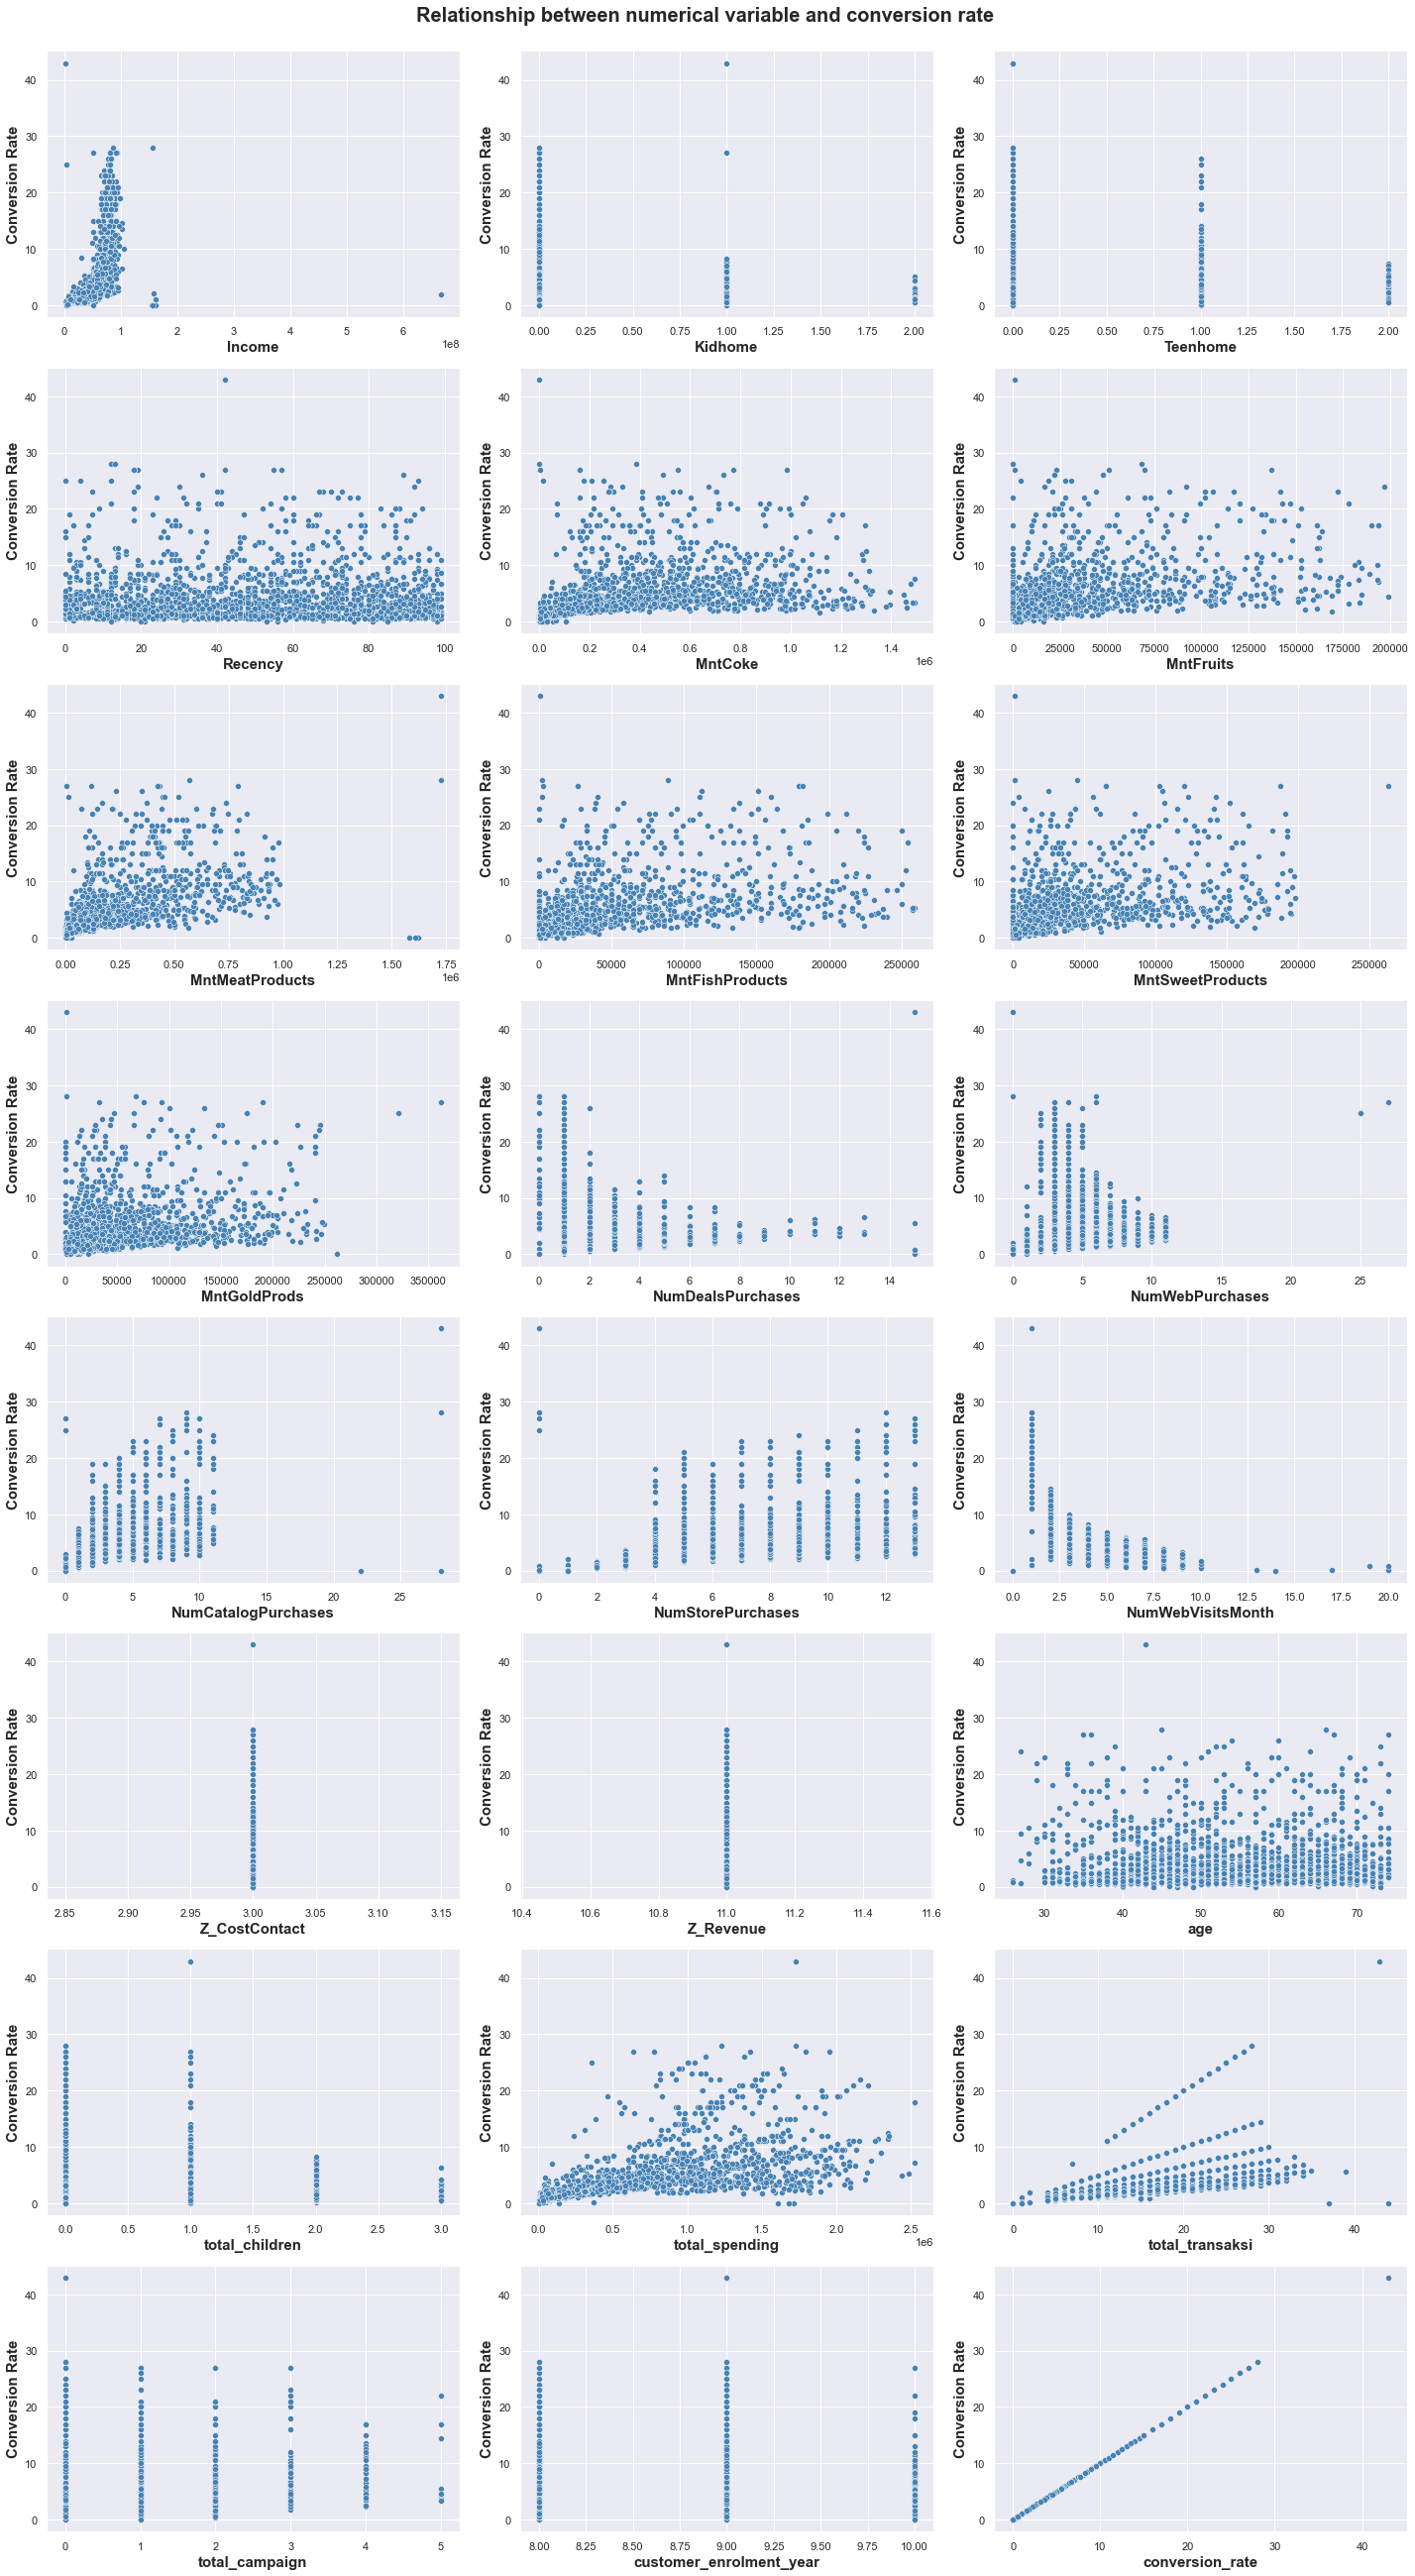

In [48]:
fitur = numeric_new.columns
for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (20,40)
    sns.set(font_scale=1)
    plt.subplot(9, 3, i+1)
    sns.scatterplot(data=df, x=fitur[i], y='conversion_rate',color='Steelblue')
    plt.xlabel(fitur[i],fontsize = 15, weight='bold')
    plt.ylabel('Conversion Rate',fontsize = 15, weight='bold')
    plt.suptitle('Relationship between numerical variable and conversion rate ', fontsize=20, y=1.0,weight='bold')
    plt.tight_layout()

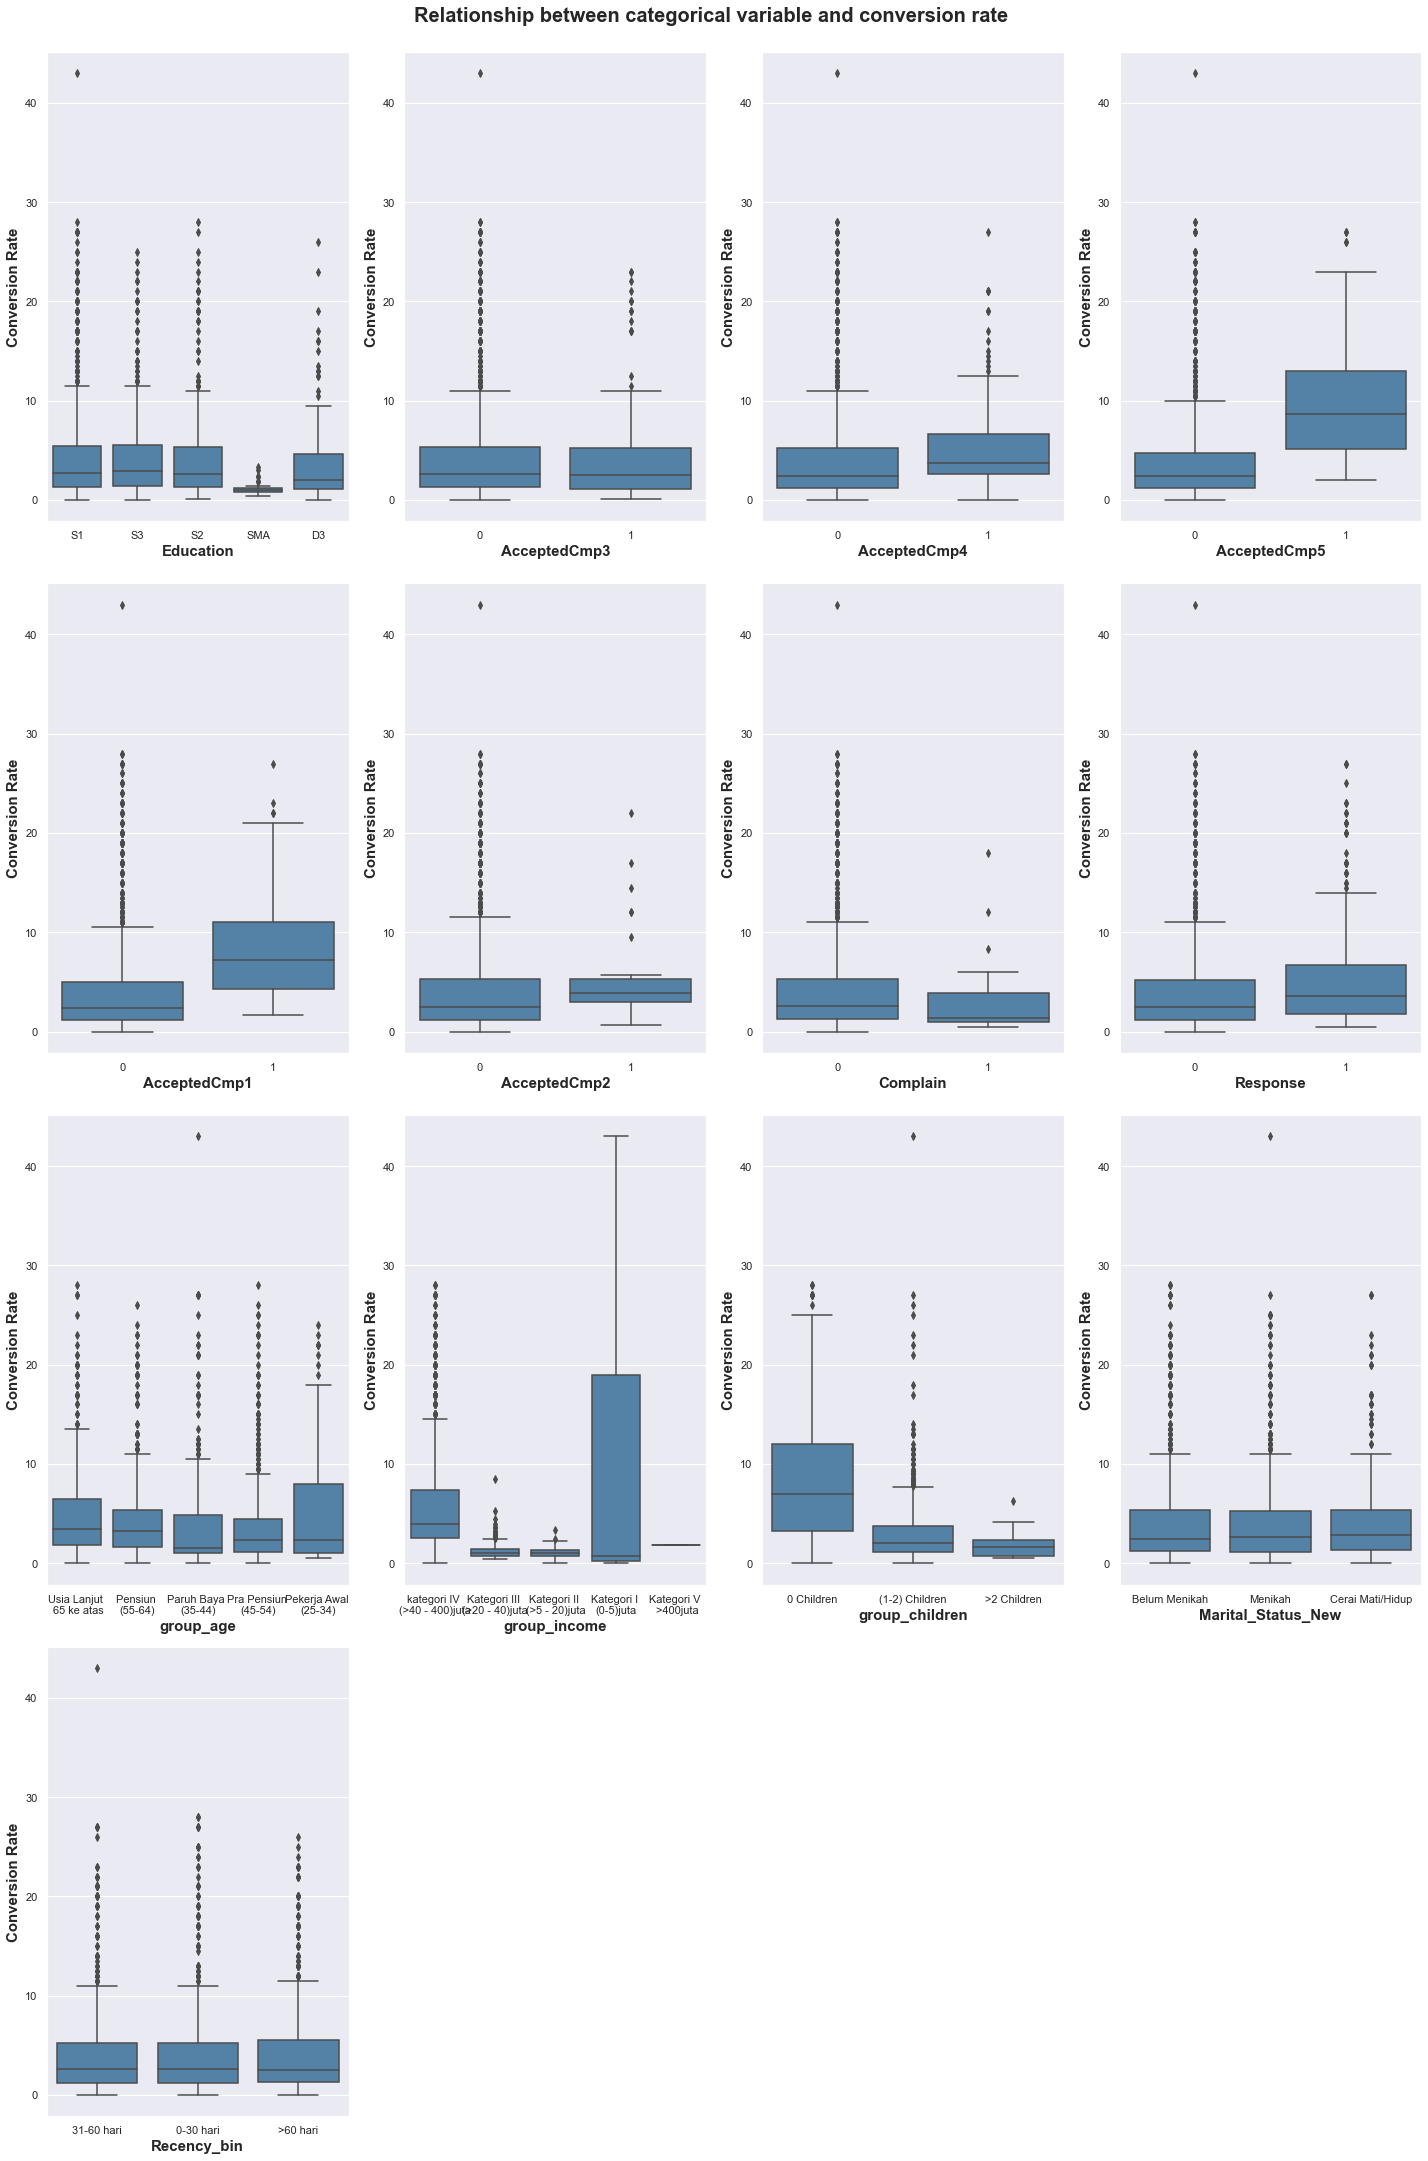

In [49]:
# fitur = ['Education','group_age','group_income','group_children','Marital_Status_New','Recency_bin','Complain']
fitur = categoric_new.columns
for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (20,30)
    sns.set(font_scale=1)
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=fitur[i], y='conversion_rate',color='Steelblue')
    plt.xlabel(fitur[i],fontsize = 15, weight='bold')
    plt.ylabel('Conversion Rate',fontsize = 15, weight='bold')
    plt.suptitle('Relationship between categorical variable and conversion rate ', fontsize=20, y=1.0,weight='bold')
    plt.tight_layout()

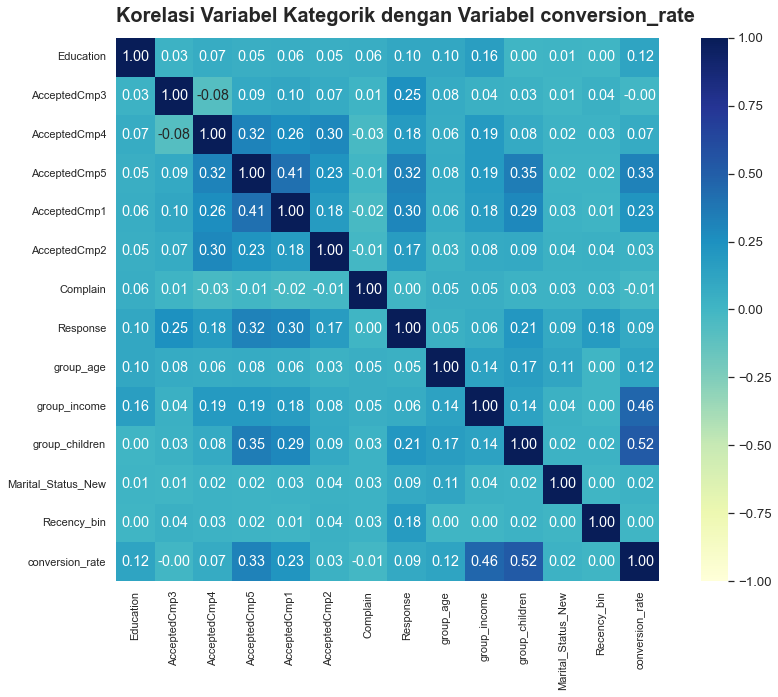

In [50]:
from dython.nominal import associations
fitur = ['Education', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',\
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'group_age',\
       'group_income', 'group_children', 'Marital_Status_New', 'Recency_bin','conversion_rate']
df_corr = df[fitur]
fig, ax = plt.subplots(figsize =(15,10))
sns.set(font_scale=1.2)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Kategorik dengan Variabel conversion_rate",fontsize=20,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(df_corr, nom_nom_assoc = 'cramer',cmap = "YlGnBu", ax=ax)

plt.show()

- Hubungan antara variabel kategorik dengan variabel kategorik tidak ada yang berkorelasi kuat (r>0.7)
- Hubungan antara variabel-variabel kategorik dengan variabel conversion_rate, hanya variabel group_income dan group_children yang memiliki korelasi sedang yaitu >0.3 dan kurang dari 0.7
- Korelasi variabel Recency_bin dengan variabel kategorik yang lain seperti education, group_age, group_income, dan marital_status_new, hampir mendekati 0 yang artinya tidak ada korelasi yang terjadi diantara variabel-variabel tersebut 
- Korelasi antara variabel group_children dengan variabel education juga mendekati 0 yang artinya tidak ada korelasi antar keduanya 

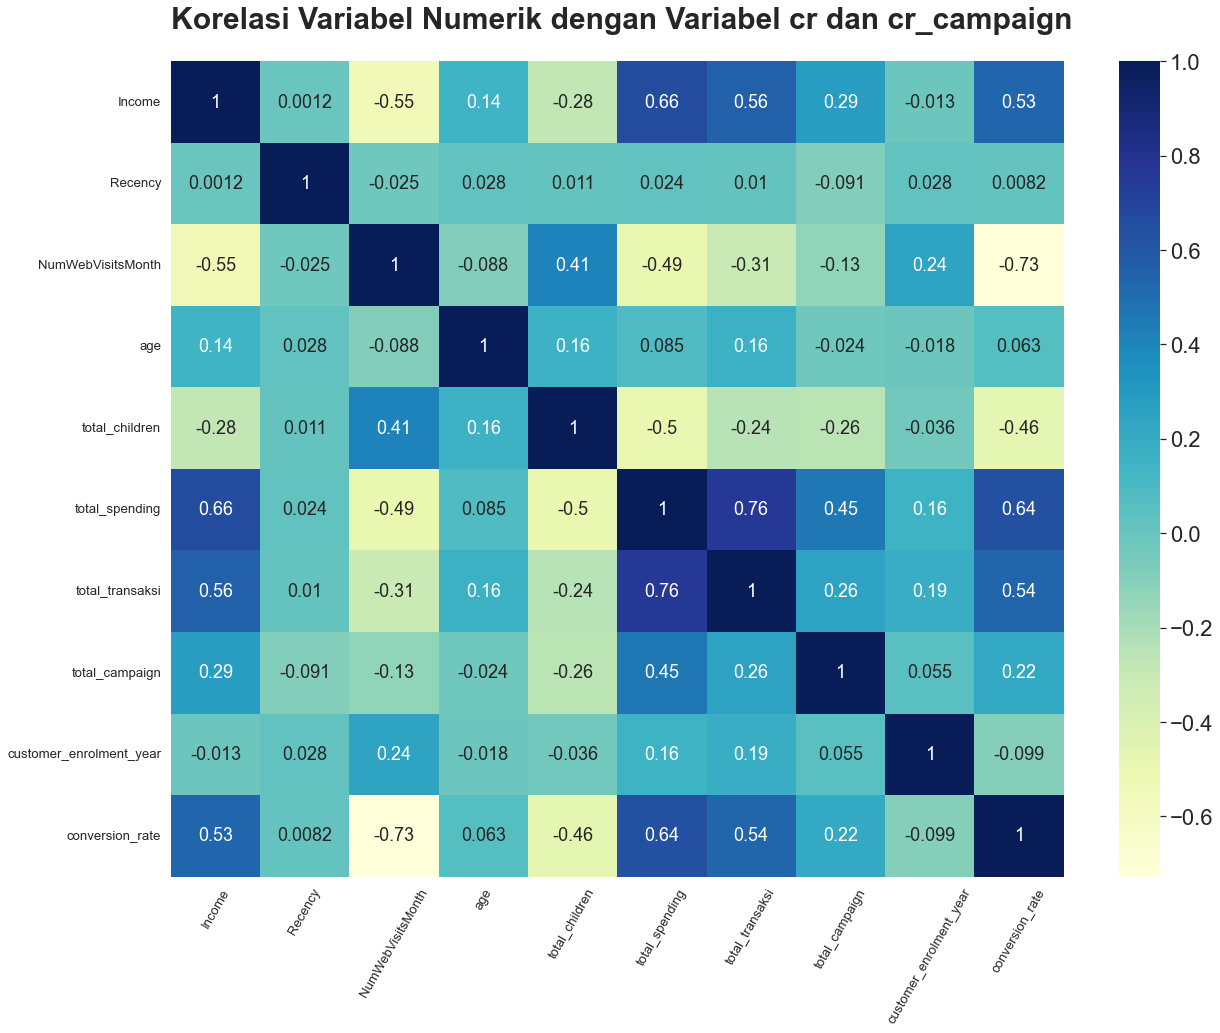

In [51]:
# fitur = numeric_new.columns
fitur =['Income', 'Recency','NumWebVisitsMonth','age','total_children','total_spending',\
        'total_transaksi','total_campaign','customer_enrolment_year','conversion_rate']
df_corr = df[fitur]
fig, ax = plt.subplots(figsize =(20, 15))
sns.set(font_scale=2)
sns.heatmap(df_corr.corr(),cmap="YlGnBu",annot=True,annot_kws={"size": 18},ax=ax)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Numerik dengan Variabel cr dan cr_campaign",fontsize=30,weight='bold')
plt.xticks(rotation = 60)
plt.show()

- Korelasi antara variabel total_spending dan total_transaksi adalah > 0.7 yang artinya korelasi positive dan kuat. Sedangkan pada variabel NumWebVisitMonth dengan variabel cr memiliki korelasi -0.72 yang artinya korelasi negative dan kuat 
- Beberapa variabel seperti income, total_spending dan total transaksi memiliki korelasi >0.3 dan <0.7 dengan variabel conversion_rate yang artinya, variabel-variabel tersebut memiliki korelasi positive yang sedang dengan variabel conversion_rate 
- Sedangkan variabel total_children dan numwebvisitmonth memiliki korelasi negative yang sedang dengan variabel conversion_rate
- Variabel total_campaign dengan cr_campaign memiliki korelasi positive sangat kuat (sempurna) yang artinya jika nilai total_campaign meningkat maka cr_campaign pun secara liniear akan meningkat
- Pada variabel total_spending memiliki korelasi positive sedang dengan variable cr_campaign

### Multivariate Analysis

In [52]:
def multi(var):
    fitur = ['group_children','group_age','group_income','Marital_Status_New']
    for i in range(0, len(fitur)):
        plt.rcParams['figure.figsize'] = (20,20)
        sns.set(font_scale=1.5)
        plt.subplot(2, 2, i+1)
        sns.boxplot(data=df, x=fitur[i], y='conversion_rate',hue=var)            
        plt.tight_layout()

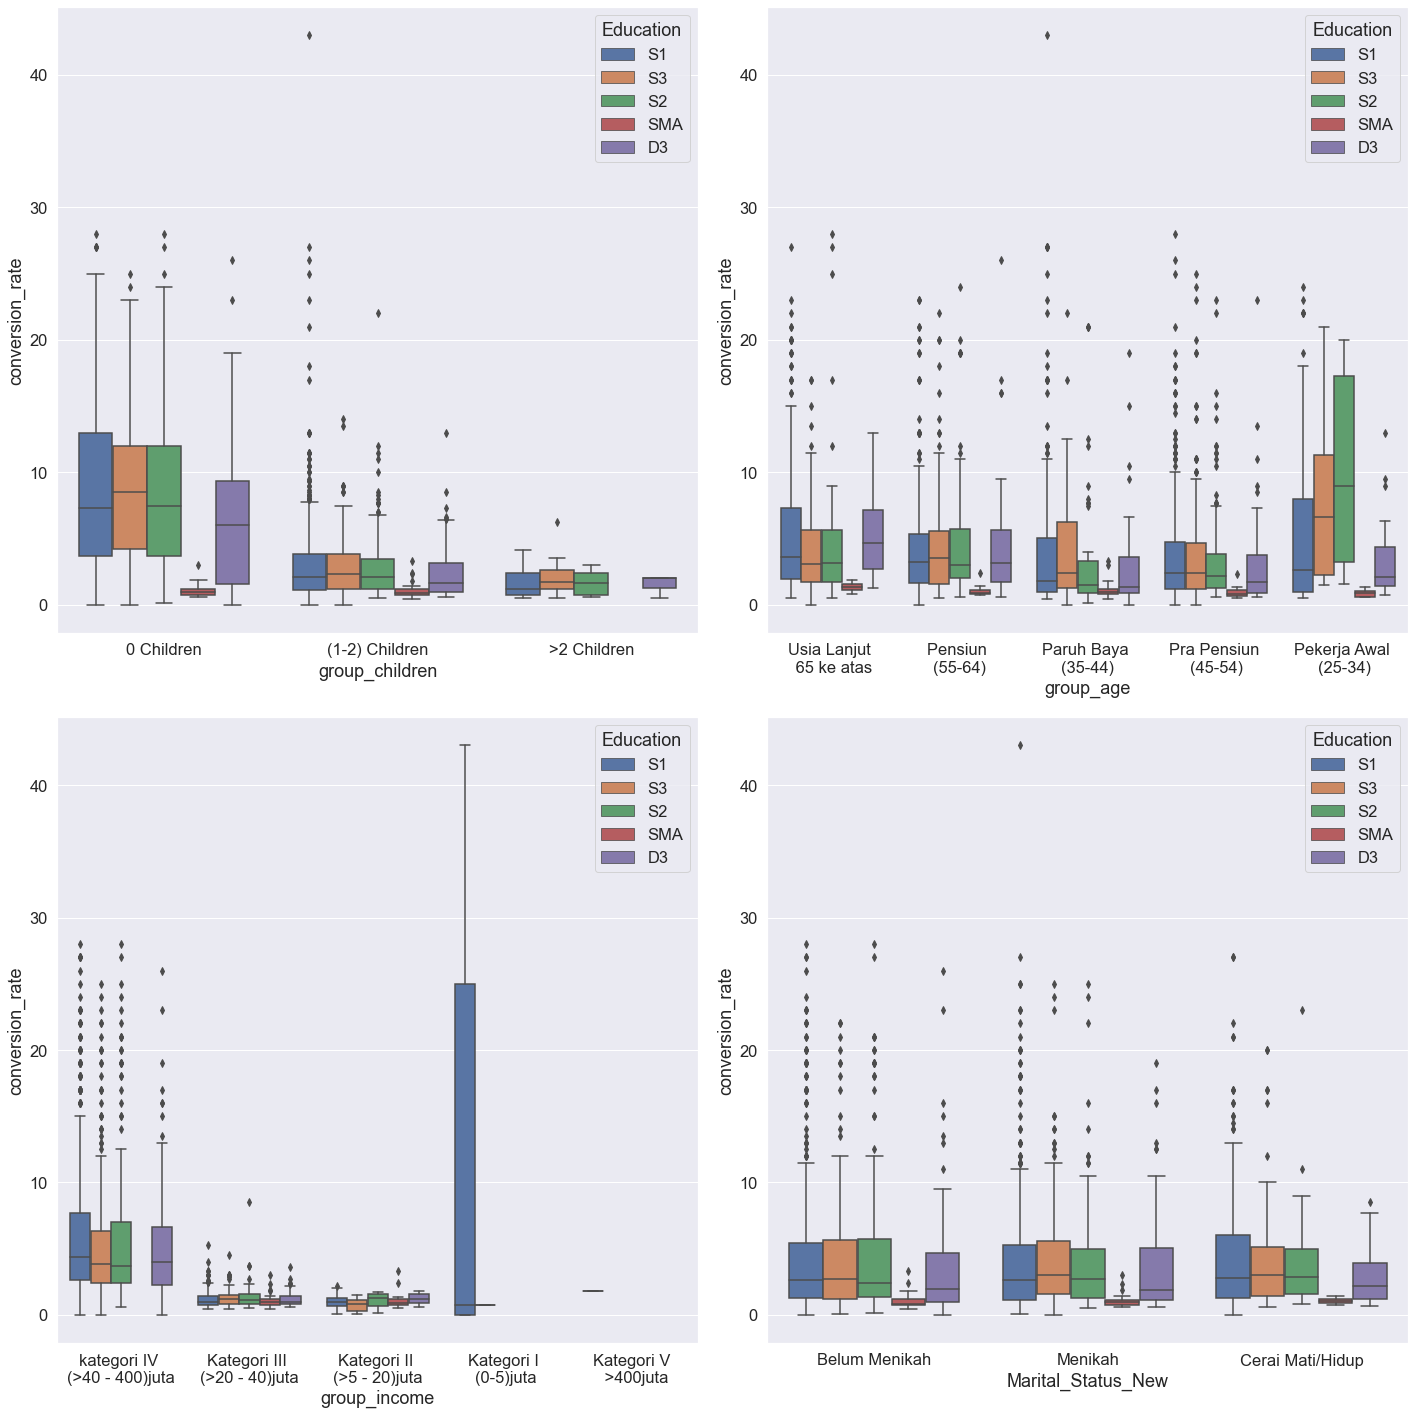

In [53]:
multi('Education')

- Secara keseluruhan untuk education kategori SMA median dari conversion ratenya lebih rendah dibandingkan dengan education D3 ke atas 
- Kelompok konsumen dengan >2 children secara keseluruhan median dari conversion ratenya lebih rendah dibandingkan group_children lainnya 
- Untuk kelompok pekerja awal(25-34) yang memiliki education S2 median dari conversion ratenya lebih tinggi dibandingkan yang lain 
- Kelompok group_income dengan education S1 memiliki conversion rate lebih dari 20 pada kelompok group_income kategori IV dan Kategori I dan hal tersebut merupakan global outlier di kelompok tersebut

# Data Preprocessing

- Cek kembali missing value dan data duplikat
- Pada proses EDA telah dilakukan handling missing value pada variabel income yaitu dengan menginputnya dengan median dari income
- Telah dilakukan penghapusan pada beberapa baris data yang dirasa kurang tepat, yaitu baris dimana konsumen melakukan transaksi di web namun tidak terhitung mengunjungi web 
- Menghapus data outlier pada variabel numerik

In [54]:
df.isnull().sum()

ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
age                        0
group_age                  0
group_income               0
total_children             0
group_children             0
total_spending

In [55]:
df.duplicated().sum()

0

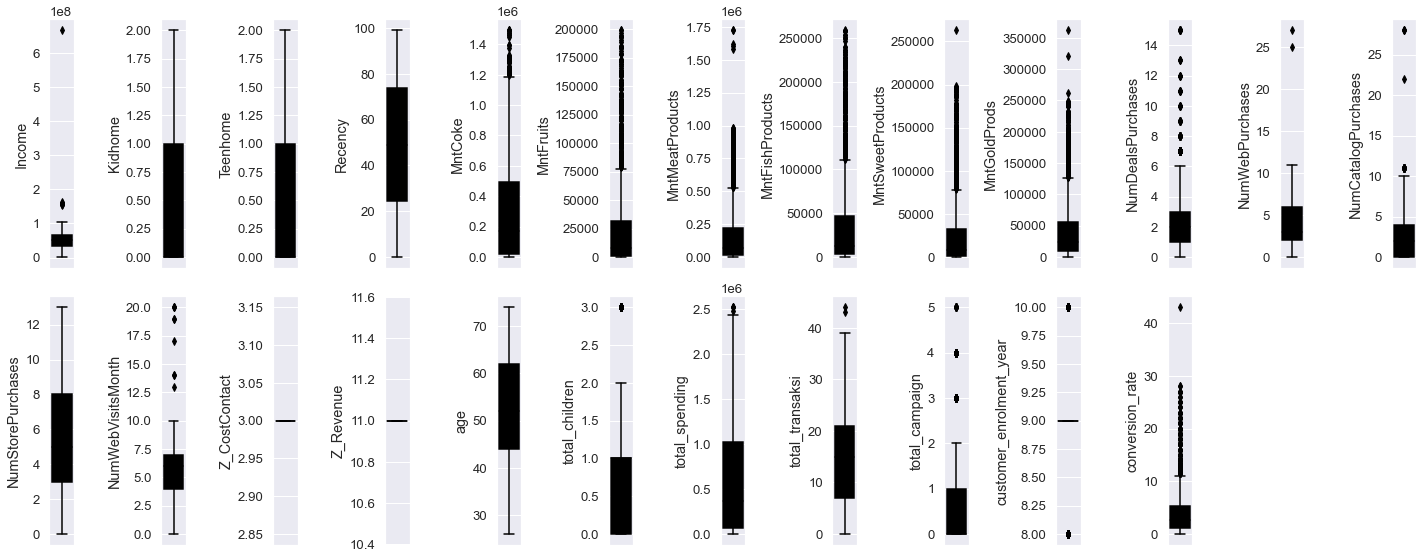

In [56]:
features = numeric_new.columns


for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20,8)
    sns.set(font_scale=1.2)
    plt.subplot(2,13,i+1)
    sns.boxplot(y=df[features[i]], color='Black')
    plt.tight_layout()

- Ada beberapa variabel yang memiliki outlier, oleh karena itu akan dicek menggunakan QQPlot untuk tipe outliernya

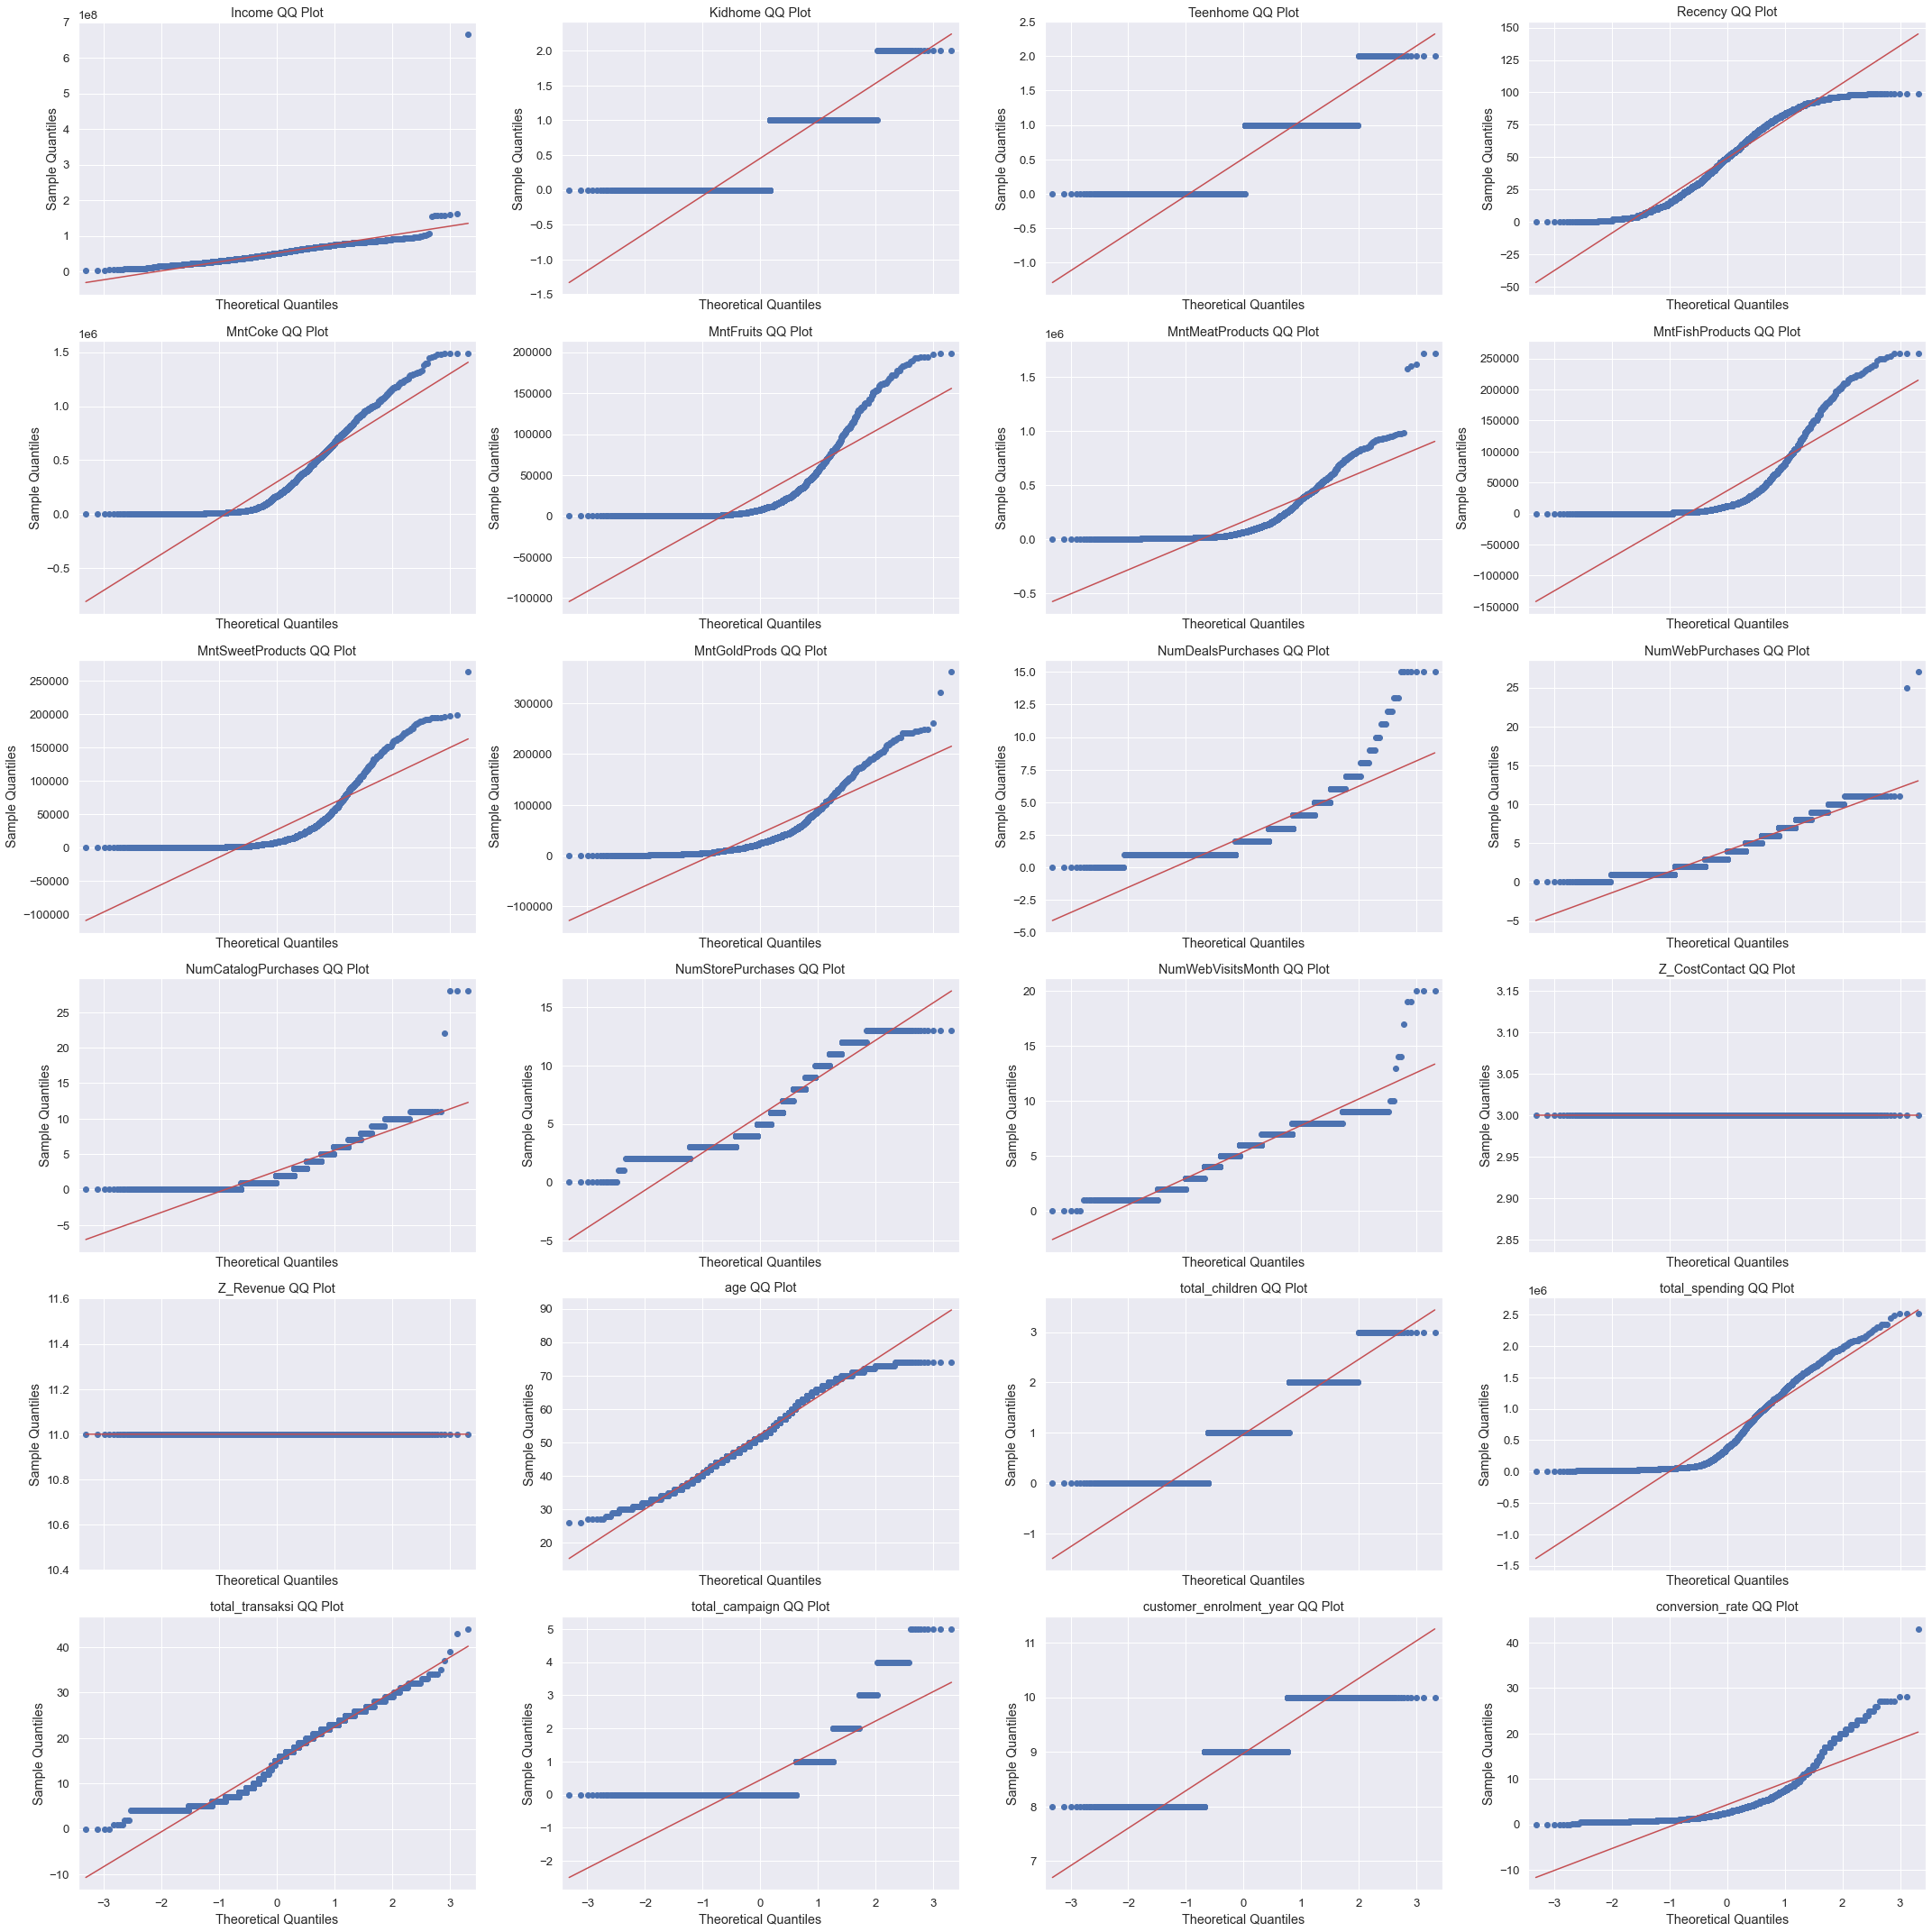

In [57]:
col = numeric_new.columns

# fig, axes = plt.subplots(ncols=4, nrows=2, sharex=True, figsize=(4*3, 2*3))
fig, axes = plt.subplots(ncols=4, nrows=6, sharex=True, figsize=(30, 30))
for i, ax in zip(col, np.ravel(axes)):
    sm.qqplot(df[i], line='s', ax=ax)
    ax.set_title(f'{i} QQ Plot')
    plt.tight_layout()

- Ada beberapa variabel yang memiliki outlier bertipe **global outlier** yaitu : \
'Income', 'MntMeatProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchase','NumCatalogPurchase', 'conversion_rate'
- Variabel yang memiliki global outlier akan dihapus dari dataset

In [58]:
fitur = ['Income', 'MntMeatProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchases','NumCatalogPurchases', 'conversion_rate']
list = []
variabel = []

for i in range(0, len(fitur)):
    Q1 = df[fitur[i]].quantile(0.25)
    Q3 = df[fitur[i]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    outlier = df[~((df[fitur[i]] >= low_limit) & (df[fitur[i]] <= high_limit))]
    out = outlier.index.tolist()
    list = list+out
list
data = pd.DataFrame(list)
data.columns = ['index']
outlier_row = [*set(list)] #digunakan agar isi list tidak ada duplicated, karena list ini yang akan digunakan untuk menghapus row based on index

In [59]:
len(outlier_row)

556

In [60]:
df_new = df.drop(index=outlier_row)

### Feature Encoding

Sebelum melakukan feature encoding terlebih dahulu menghapus variabel-variabel yang tidak penting

In [61]:
df_new = df_new.drop(['ID','Year_Birth','Marital_Status', 'AcceptedCmp3',\
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', \
       'Dt_Customer','Z_CostContact', 'Z_Revenue','Kidhome','Teenhome',], axis =1)

**Encoding Fitur Kategorik dan Numerik**

Strategi encoding

- Standard Scaler : Semua variabel numerik karena bukan distribusi normal
- Label Encoding : Education, Complain, group_age, group_income, group_children, Recency_bin
- One Hot Encoding : Marital_Status_New

In [62]:
num_enc = df_new.select_dtypes(include=np.number).drop('Complain', axis=1).columns
cat_enc = df_new.select_dtypes(include=np.object).columns.tolist() + ['Complain']

In [63]:
kolom = cat_enc
for col in kolom:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
S1     1111
S3      455
S2      357
D3      199
SMA      53
Name: Education, dtype: int64
------------------------------ 

value counts of column group_age
Pra Pensiun \n(45-54)        731
Pensiun \n(55-64)            485
Paruh Baya \n(35-44)         434
Usia Lanjut \n 65 ke atas    405
Pekerja Awal \n(25-34)       120
Name: group_age, dtype: int64
------------------------------ 

value counts of column group_income
kategori IV \n(>40 - 400)juta    1450
Kategori III \n(>20 - 40)juta     599
Kategori II \n(>5 - 20)juta       119
Kategori I \n(0-5)juta              6
Kategori V \n >400juta              1
Name: group_income, dtype: int64
------------------------------ 

value counts of column group_children
(1-2) Children    1540
0 Children         584
>2 Children         51
Name: group_children, dtype: int64
------------------------------ 

value counts of column Marital_Status_New
Belum Menikah       1031
Menikah              843
Cerai Mati/Hidup     301

In [64]:
kolom = df_new.select_dtypes(include=np.object).columns
# ['Education', 'group_age', 'group_income', 'group_children',
#        'Marital_Status_New', 'Recency_bin']

mapping_pendidikan = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
mapping_complain = {
    0 : 0,
    1 : 1
}

mapping_group_age = {
    'Pekerja Awal \n(25-34)' : 0,
    'Paruh Baya \n(35-44)' : 1,
    'Pra Pensiun \n(45-54)' : 2,
    'Pensiun \n(55-64)' : 3,
    'Usia Lanjut \n 65 ke atas' : 4
}

mapping_group_income = {
    'Kategori I \n(0-5)juta' : 0,
    'Kategori II \n(>5 - 20)juta' : 1,
    'Kategori III \n(>20 - 40)juta' : 2,
    'kategori IV \n(>40 - 400)juta' : 3,
    'Kategori V \n >400juta' : 4
}

mapping_group_children = {
    '0 Children' : 0,
    '(1-2) Children' : 1,
    '>2 Children' : 2
}

mapping_recency_bin = {
    '0-30 hari' : 0,
    '31-60 hari' : 1,
    '>60 hari' : 2
}

In [65]:
list_mapping = [mapping_pendidikan, mapping_group_age, mapping_group_income, mapping_group_children, mapping_recency_bin,mapping_complain]

In [66]:
#StandardScaler
num_enc
scaler = StandardScaler()

for i in range(len(num_enc)):
    df_new[num_enc[i]+'_'+'std'] = scaler.fit_transform(df_new[num_enc[i]].values.reshape(len(df_new), 1)) 
    
#Label Encoding
cat_le = ['Education', 'group_age', 'group_income', 'group_children', 'Recency_bin', 'Complain']
mapping = list_mapping
for i in range(len(cat_le)):
    for j in range(len(mapping)):
        if i==j:
            df_new[cat_le[i]+'_'+'le'] = df_new[cat_le[i]].map(mapping[j])
            
#Onehot Encoding            
onehots = pd.get_dummies(df_new['Marital_Status_New'], prefix='Marital_Status_New')

In [67]:
df_new[onehots.columns] = onehots

In [68]:
# df_new = df_new.join(onehots)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,age,group_age,group_income,total_children,group_children,total_spending,total_transaksi,total_campaign,Marital_Status_New,customer_enrolment_year,Recency_bin,conversion_rate,Income_std,Recency_std,MntCoke_std,MntFruits_std,MntMeatProducts_std,MntFishProducts_std,MntSweetProducts_std,MntGoldProds_std,NumDealsPurchases_std,NumWebPurchases_std,NumCatalogPurchases_std,NumStorePurchases_std,NumWebVisitsMonth_std,age_std,total_children_std,total_spending_std,total_transaksi_std,total_campaign_std,customer_enrolment_year_std,conversion_rate_std,Education_le,group_age_le,group_income_le,group_children_le,Recency_bin_le,Complain_le,Marital_Status_New_Belum Menikah,Marital_Status_New_Cerai Mati/Hidup,Marital_Status_New_Menikah
0,S1,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,68,Usia Lanjut \n 65 ke atas,kategori IV \n(>40 - 400)juta,2,(1-2) Children,27000,6,0,Belum Menikah,8,31-60 hari,1.20,0.133956,-0.358398,-0.675111,-0.502749,-0.682881,-0.500426,-0.632929,-0.725942,-0.280218,-1.007992,-0.293496,-1.023477,-0.543387,1.424157,1.196481,-0.776835,-0.920877,-0.438244,-1.390732,-0.641976,2,4,3,1,1,0,1,0,0
1,S1,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,57,Pensiun \n(55-64),kategori IV \n(>40 - 400)juta,0,0 Children,776000,21,0,Belum Menikah,9,0-30 hari,5.25,1.599197,-0.772712,0.753325,1.435806,0.539038,2.708306,0.644847,0.598837,-0.818383,1.726884,0.204064,1.811440,-1.043809,0.415334,-1.696877,1.025438,1.178784,-0.438244,0.069446,1.386125,2,3,3,0,0,0,1,0,0
2,S1,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,38,Paruh Baya \n(35-44),Kategori III \n(>20 - 40)juta,1,(1-2) Children,53000,8,0,Belum Menikah,8,0-30 hari,1.33,-1.008247,-0.772712,-0.675111,-0.381590,-0.541502,-0.264923,-0.505152,-0.762741,-0.280218,-0.617296,-0.791056,-0.314748,-0.042964,-1.327178,-0.250198,-0.714272,-0.640922,-0.438244,-1.390732,-0.576877,2,1,2,1,0,0,1,0,0
3,S3,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,41,Paruh Baya \n(35-44),kategori IV \n(>40 - 400)juta,1,(1-2) Children,422000,19,0,Menikah,8,>60 hari,3.80,0.826827,1.575067,-0.117505,1.193487,0.448152,0.794842,1.028179,-0.394747,1.334276,0.554794,0.701624,0.393982,-0.543387,-1.052044,-0.250198,0.173630,0.898830,-0.438244,-1.390732,0.660015,4,1,3,1,2,0,0,0,1
4,S2,62513000.0,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,55,Pensiun \n(55-64),kategori IV \n(>40 - 400)juta,1,(1-2) Children,716000,22,0,Belum Menikah,9,0-30 hari,3.67,1.071527,-1.117974,1.076874,1.153100,0.246182,-0.559302,1.986511,-0.431546,-0.280218,0.945491,1.199184,1.811440,-0.042964,0.231912,-0.250198,0.881064,1.318762,-0.438244,0.069446,0.594915,3,3,3,1,0,0,1,0,0


In [71]:
rslt_df = df_new.drop(df_new.iloc[:, 0:27],axis = 1)

In [72]:
rslt_df.head()

,Income_std,Recency_std,MntCoke_std,MntFruits_std,MntMeatProducts_std,MntFishProducts_std,MntSweetProducts_std,MntGoldProds_std,NumDealsPurchases_std,NumWebPurchases_std,NumCatalogPurchases_std,NumStorePurchases_std,NumWebVisitsMonth_std,age_std,total_children_std,total_spending_std,total_transaksi_std,total_campaign_std,customer_enrolment_year_std,conversion_rate_std,Education_le,group_age_le,group_income_le,group_children_le,Recency_bin_le,Complain_le,Marital_Status_New_Belum Menikah,Marital_Status_New_Cerai Mati/Hidup,Marital_Status_New_Menikah
0,0.133956,-0.358398,-0.675111,-0.502749,-0.682881,-0.500426,-0.632929,-0.725942,-0.280218,-1.007992,-0.293496,-1.023477,-0.543387,1.424157,1.196481,-0.776835,-0.920877,-0.438244,-1.390732,-0.641976,2,4,3,1,1,0,1,0,0
1,1.599197,-0.772712,0.753325,1.435806,0.539038,2.708306,0.644847,0.598837,-0.818383,1.726884,0.204064,1.811440,-1.043809,0.415334,-1.696877,1.025438,1.178784,-0.438244,0.069446,1.386125,2,3,3,0,0,0,1,0,0
2,-1.008247,-0.772712,-0.675111,-0.381590,-0.541502,-0.264923,-0.505152,-0.762741,-0.280218,-0.617296,-0.791056,-0.314748,-0.042964,-1.327178,-0.250198,-0.714272,-0.640922,-0.438244,-1.390732,-0.576877,2,1,2,1,0,0,1,0,0
3,0.826827,1.575067,-0.117505,1.193487,0.448152,0.794842,1.028179,-0.394747,1.334276,0.554794,0.701624,0.393982,-0.543387,-1.052044,-0.250198,0.173630,0.898830,-0.438244,-1.390732,0.660015,4,1,3,1,2,0,0,0,1
4,1.071527,-1.117974,1.076874,1.153100,0.246182,-0.559302,1.986511,-0.431546,-0.280218,0.945491,1.199184,1.811440,-0.042964,0.231912,-0.250198,0.881064,1.318762,-0.438244,0.069446,0.594915,3,3,3,1,0,0,1,0,0


### Feature Selection

Terlebih dahulu melakukan Feature Selection, dimana pada case ini digunakan metode RFM (Recency, Frequency, Monetary Analysis)
- Recency : kolom Recency_std (yang sudah dilakukan standarisasi)
- Frequency : kolom total_transaksi_std
- Monetary : total_spending_std atau total amount spent per customer

In [75]:
data = rslt_df[['Recency_std','total_transaksi_std','total_spending_std']]
data.head()

,Recency_std,total_transaksi_std,total_spending_std
0,-0.358398,-0.920877,-0.776835
1,-0.772712,1.178784,1.025438
2,-0.772712,-0.640922,-0.714272
3,1.575067,0.898830,0.173630
4,-1.117974,1.318762,0.881064


In [153]:
from sklearn import metrics
from scipy.spatial.distance import cdist

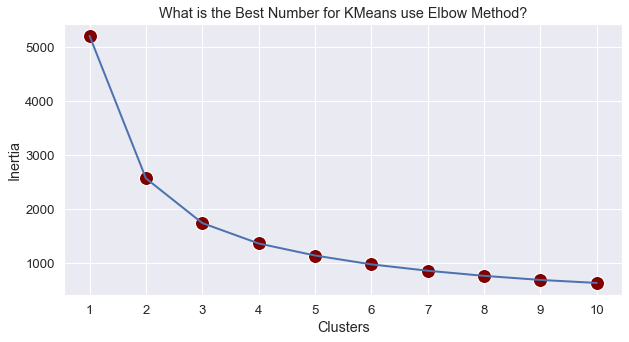

In [152]:
inertia=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,11), y=inertia, linewidth=2)
sns.scatterplot(x=range(1,11), y=inertia, s=200, color='#800000')
plt.title('What is the Best Number for KMeans use Elbow Method?')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.show()

Dari Elbow Method diatas dapat dilihat bahwa penambahan cluster dari 1 ke 2 turun signifikan sehingga kita bisa ambil kesimpulan bahwa cukup di 2 cluster saja untuk jumlah cluster yang optimal

In [84]:
(pd.Series(inertia)-pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    47.147732
1    33.501559
2    20.542844
3    20.522516
4    13.564796
5    14.515489
6    12.463746
7     8.453842
8     6.704063
9          NaN
dtype: float64

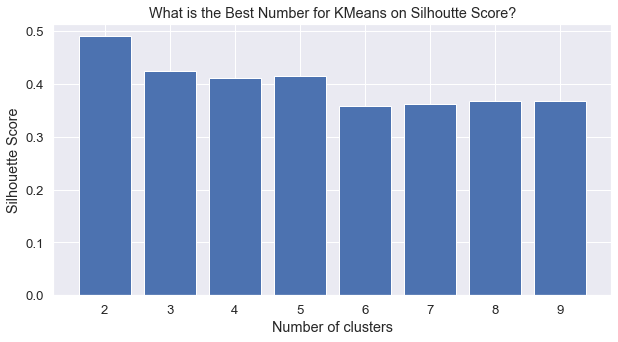

In [155]:
score = []
for i in range(2,10):
    cluster_=KMeans(n_clusters=i, random_state=42)
    pred = cluster_.fit_predict(data)
    score.append(silhouette_score(data, pred))
plt.figure(figsize=(10,5))
plt.bar(range(2,10), score)
plt.title('What is the Best Number for KMeans on Silhoutte Score?')
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show()

In [91]:
silhouette_scores

[0.4533194153032299,
 0.40676943643661456,
 0.3965052243887744,
 0.40445436317316225,
 0.3641188772187881,
 0.36909167421212175,
 0.3729175866599577,
 0.3754578528460473]

Berdasarkan grafik Elbow Mehod dan Silouette Score, cluster optimal yang dapat digunakan dalam case ini akan 2 cluster.

In [92]:
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(data.values)
clusters=kmeans.predict(data)

In [93]:
data['cluster'] = clusters + 1

In [101]:
data.head(5)

,Recency_std,total_transaksi_std,total_spending_std,cluster
0,-0.358398,-0.920877,-0.776835,2
1,-0.772712,1.178784,1.025438,1
2,-0.772712,-0.640922,-0.714272,2
3,1.575067,0.898830,0.173630,1
4,-1.117974,1.318762,0.881064,1


In [102]:
pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = data['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,-1.230891,-0.395637,2
1,1.712191,-0.723701,1
2,-0.987436,-0.802026,2
3,0.879726,1.598827,1
4,1.719671,-1.068584,1


In [ ]:
linestyle='--'

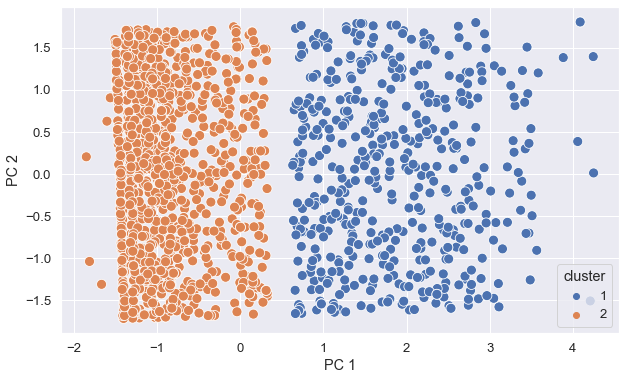

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC 1', y='PC 2', hue='cluster',data=data_pca,s=100,palette="deep")
plt.show()

In [117]:
df_new['cluster'] = data['cluster']
df_new['cluster'].replace([1,2], ['Tipe 1','Tipe 2'], inplace=True)
num_cluster = df_new[['Income', 'Recency', 'total_spending','total_transaksi',\
                      'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',\
                      'NumStorePurchases', 'NumWebVisitsMonth','cluster','conversion_rate']]
cat_cluster = df_new[['total_children','Education', 'group_age', 'group_income', 'Recency_bin','Marital_Status_New','Complain','cluster']].astype(str)

In [118]:
display(num_cluster.groupby('cluster').agg(['sum','mean','median', 'max', 'min']))

Income                                                    \
                  sum          mean      median         max         min   
cluster                                                                   
Tipe 1   3.196072e+10  6.122744e+07  61267000.0  93404000.0  24401000.0   
Tipe 2   3.933007e+10  3.585239e+07  35704000.0  73395000.0   1730000.0   

        Recency                           total_spending                 \
            sum       mean median max min            sum           mean   
cluster                                                                   
Tipe 1    24463  46.863985   48.0  99   0      443805000  850201.149425   
Tipe 2    53865  49.102097   49.0  99   0      122589000  111749.316317   

                                   total_transaksi                            \
           median      max     min             sum       mean median max min   
cluster                                                                        
Tipe 1   769000.0  2231000  264000           11164  21.386973   21.0  35  10   
Tipe 2    68000.0   467000    5000            9201   8.387420    8.0  18   0   

        NumDealsPurchases                          NumWebPurchases            \
                      sum      mean median max min             sum      mean   
cluster                                                                        
Tipe 1               1755  3.362069    3.0  13   0            3309  6.339080   
Tipe 2               2326  2.120328    2.0  15   0            2487  2.267092   

                       NumCatalogPurchases                           \
        median max min                 sum      mean median max min   
cluster                                                               
Tipe 1     6.0  11   2                1899  3.637931    3.0  10   0   
Tipe 2     2.0   9   0                 675  0.615314    0.0   5   0   

        NumStorePurchases                          NumWebVisitsMonth  \
                      sum      mean median max min               sum   
cluster                                                                
Tipe 1               4201  8.047893    8.0  13   3              2845   
Tipe 2               3713  3.384686    3.0   9   0              7008   

                                 conversion_rate                               
             mean median max min             sum      mean median   max   min  
cluster                                                                        
Tipe 1   5.450192    5.0  10   1         2368.50  4.537356   4.00  11.0  1.67  
Tipe 2   6.388332    7.0  20   1         1649.84  1.503956   1.25   8.5  0.00

In [119]:
display(cat_cluster.groupby('cluster').describe())

total_children                 Education                 group_age  \
                 count unique top freq     count unique top freq     count   
cluster                                                                      
Tipe 1             522      4   1  331       522      4  S1  244       522   
Tipe 2            1097      4   1  616      1097      5  S1  543      1097   

                                           group_income         \
        unique                    top freq        count unique   
cluster                                                          
Tipe 1       5  Pra Pensiun \n(45-54)  173          522      2   
Tipe 2       5  Pra Pensiun \n(45-54)  395         1097      4   

                                            Recency_bin                        \
                                   top freq       count unique       top freq   
cluster                                                                         
Tipe 1   kategori IV \n(>40 - 400)juta  505         522      3  >60 hari  189   
Tipe 2   Kategori III \n(>20 - 40)juta  573        1097      3  >60 hari  419   

        Marital_Status_New                            Complain             \
                     count unique            top freq    count unique top   
cluster                                                                     
Tipe 1                 522      3  Belum Menikah  236      522      2   0   
Tipe 2                1097      3  Belum Menikah  533     1097      2   0   

               
         freq  
cluster        
Tipe 1    518  
Tipe 2   1086

Total Spending dan Transaksi masing-masing Cluster

In [147]:
spend = df_new[['total_spending','total_transaksi','cluster']].groupby(['cluster']).agg(['sum'])
spend.columns = ['total_spending','total_transaksi']
spend = spend.reset_index()
spend

,cluster,total_spending,total_transaksi
0,Tipe 1,443805000,11164
1,Tipe 2,122589000,9201


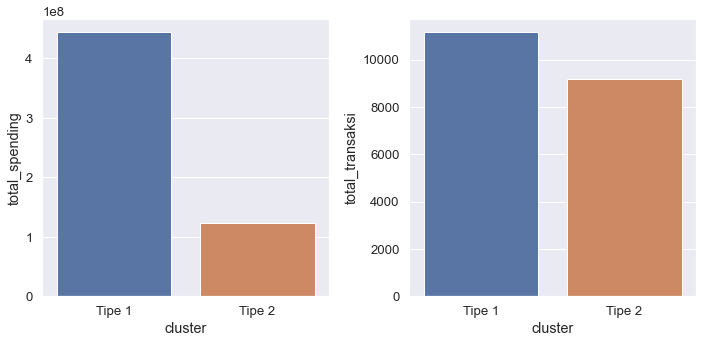

In [148]:
fitur = ['total_spending', 'total_transaksi']

for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (10,5)
    sns.set(font_scale=1.2)
    plt.subplot(1, 2, i+1)
    sns.barplot(data=spend, x='cluster', y=fitur[i])
    plt.tight_layout()

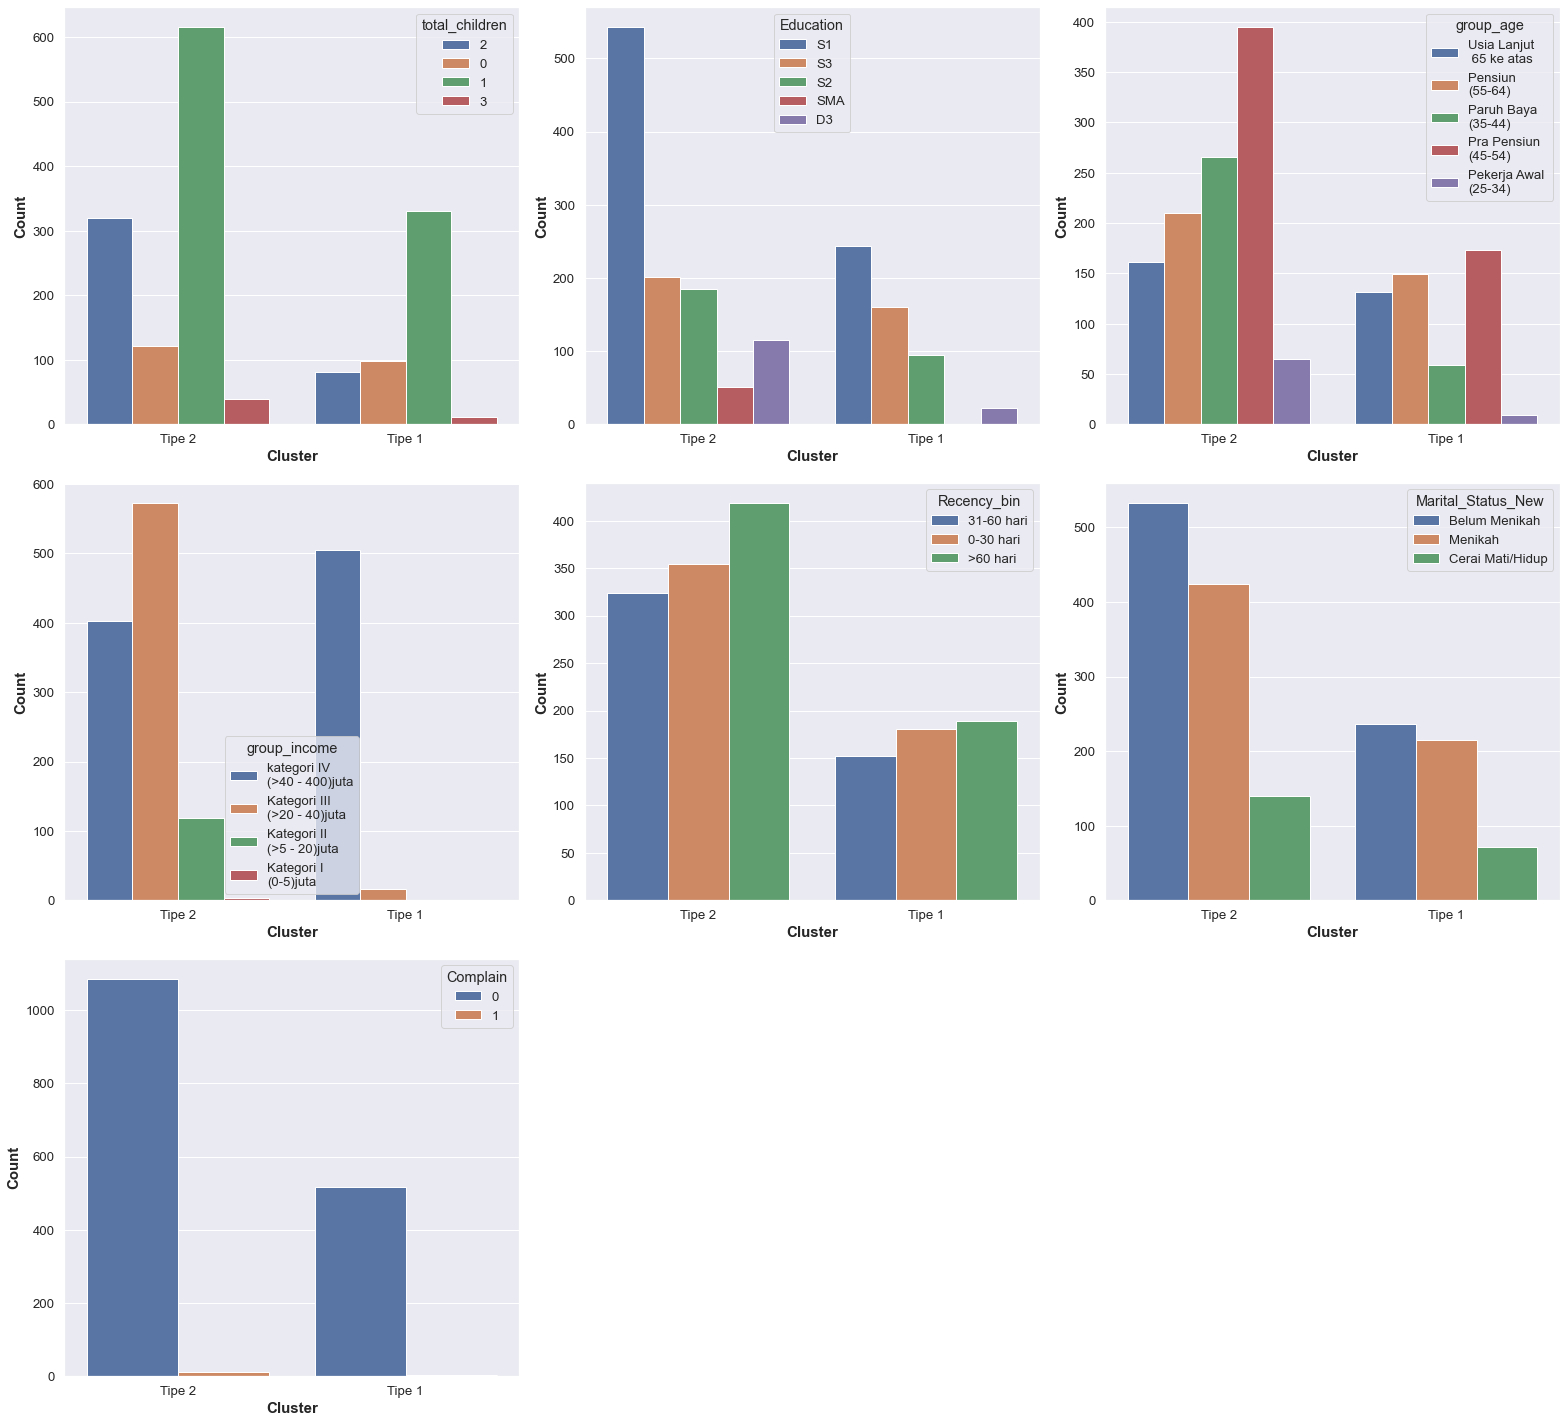

In [120]:
fitur = cat_cluster.drop('cluster', axis=1).columns

for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (22,20)
    sns.set(font_scale=1.2)
    plt.subplot(3, 3, i+1)
    sns.countplot(hue=cat_cluster[fitur[i]], x= cat_cluster['cluster'])
    plt.xlabel('Cluster',fontsize = 15, weight='bold')
    plt.ylabel('Count',fontsize = 15, weight='bold')
    plt.tight_layout()

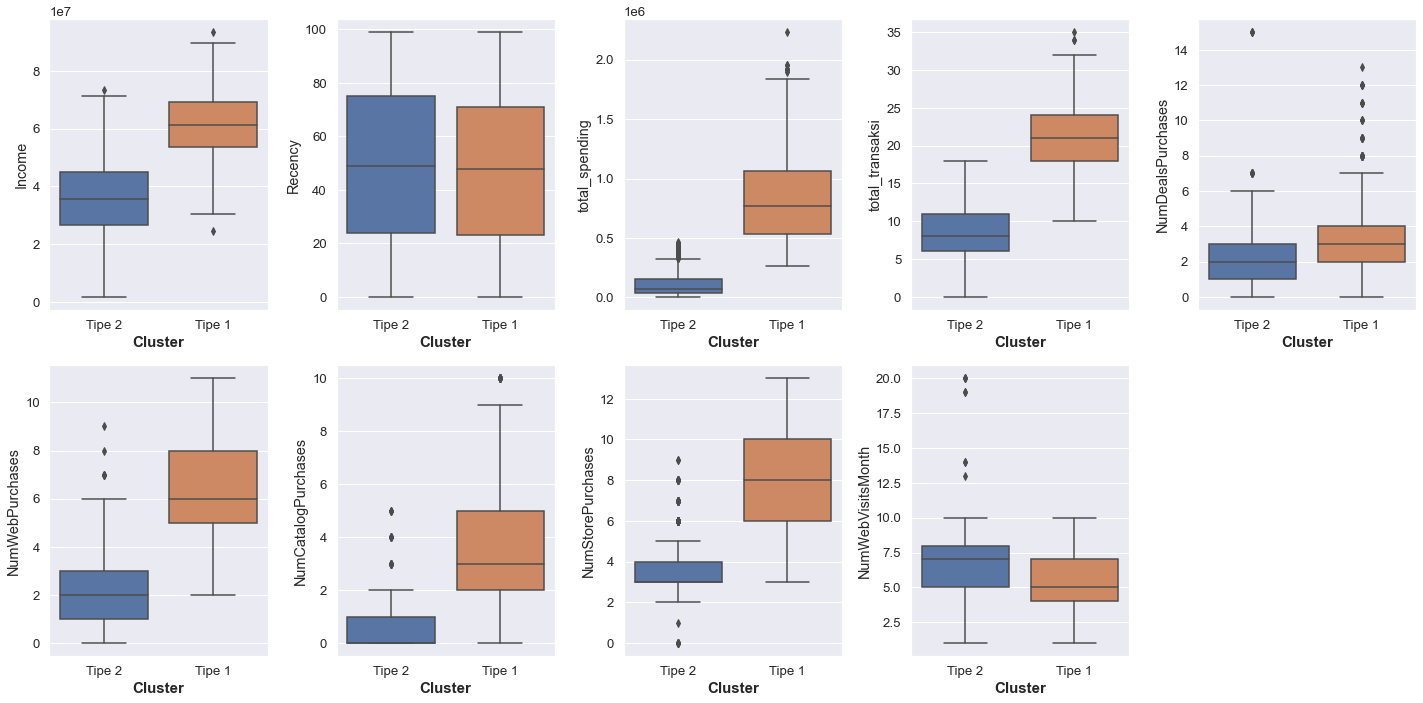

In [121]:
fitur = ['Income', 'Recency', 'total_spending','total_transaksi',\
                      'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',\
                      'NumStorePurchases', 'NumWebVisitsMonth']
for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (20,10)
    sns.set(font_scale=1.2)
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=num_cluster[fitur[i]], x = num_cluster['cluster'])
    plt.xlabel('Cluster',fontsize = 15, weight='bold')
    plt.tight_layout()

### Business Insight

**Tipe 1 (Cluster 1)**

- Konsumen tipe 1 merupakan tipe konsumen dengan rata-rata income tinggi dimana rata-ratanya 61.227k atau 2x lipat dari income konsumen tipe 2
- Total spending konsumen konsumen tipe 1 lebih tinggi dibandingkan tipe lain, meskipun jumlah konsumen setengah dari tipe 2. 
- Total transaksi konsumen 1 merupakan yang tertinggi dimana rata-ratanya adalah 21 transaksi dengan minimal transaksi adalah 10. 
- Konsumen tipe 1 selalu melakukan pembelian di website minimal 2 pembelian
- Sedangkan pembelian di store minimal 3x dan setiap bulannya selalu mengunjungi website minimal 1x. 
- Konsumen tipe 1 mayoritas didominasi konsumen yang memiliki satu orang anak 
- Konsumen tipe 1 didominasi dari background pendidikan S1 
- Mayoritas konsumen tipe 1 merupakan konsumen dengan usia 45-54 atau Pra Pensiun 
- Konsumen tipe 1 mayoritas memiliki income dengan Kategori IV
- Konsumen tipe 1 merupakan konsumen yang mayoritas melakukan pembelian terakhir sejak >60 hari terakhir
- Mayoritas konsumen tipe 1 belum menikah 
- Minimal pembelian dengan menggunakan diskon masih 0
- Minimal pembelian dengan menggunakan diskon dan katalog masih 0


**Tipe 2 (Cluster 2)**
- Rata-rata Total spending konsumen tipe 2 adalah seperdelapan dari konsumen tipe 1, dimana minimal total spending adalah 5000
- Tidak semua konsumen tipe 2 melakukan transaksi, hal ini terlihat dari minimal total transaksi yaitu 0 
- Semua konsumen tipe 2 melakukan kunjungan website dimana minimal 1 kunjungan 
- Mayoritas konsumen tipe 2 memiliki 1 orang anak
- Background pendidikan konsumen tipe 2 adalah S1 
- Mayoritas konsumen tipe 2 berusia 45-54 atau Pra Pensiun 
- Sebagian besar konsumen tipe 2 memiliki pendapatan kategori III atau pendapatan >20 juta hingga 40 juta 
- Konsumen tipe 2 melakukan pembelian terakhir adalah >60 hari terakhir 
- Sebagian besar konsumen tipe 2 belum menikah 
- Minimal pembelian dengan menggunakan diskon dan katalog masih 0

### Business Recommendation 

- Mempertahankan konsumen tipe 1 agar supaya tidak churn
- Mengoptimalkan konsumen tipe 2 untuk melakukan transaksi karena terlihat minimal transaksinya masih 0 
- Mengoptimalkan pembelian dengan diskon karena pada kedua tipe konsumen minimal pembelian masih 0, hal ini mengindikasikan bahwa tidak semua konsumen baik dari kedua tipe memanfaatkan diskon yang ada 
- Jumlah konsumen tipe 2 memang lebih banyak, namun secara jumlah spending dan total transaksi lebih sedikit dibandingkan tipe 1. Perlu dilihat kembali faktor-faktor yang mempengaruhi, misal seperti diskon yang dirasa kurang (terlihat dari pembelian dengan diskon)
- Mengoptimalkan pembelian dengan Deals/Diskon dan Catalog, karena minimal pembelian dengan Deals/Diskon dan Catalog pada kedua tipe konsumen masih 0